# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Hypothesis Testing in Python</h1>

Hypothesis testing lets you answer questions about your datasets in a statistically rigorous way. In this course, you'll grow your Python analytical skills as you learn how and when to use common tests like t-tests, proportion tests, and chi-square tests. Working with real-world data, including Stack Overflow user feedback and supply-chain data for medical supply shipments, you'll gain a deep understanding of how these tests work and the key assumptions that underpin them. You'll also discover how non-parametric tests can be used to go beyond the limitations of traditional hypothesis tests.

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [1. Introduction to Hypothesis Testing](#1)
    - Hypothesis tests and z-scores
    - p-values
    - Statistical significance

* [2. Two-Sample and ANOVA Tests](#2) 
    - Performing t-tests
    - Calculating p-values from t-statistics
    - Paired t-tests
    - ANOVA tests
    
* [3. Proportion Tests](#3)
    - One-sample roportion tests
    - Two-sample roportion tests
    - Chi-square test of indepence
    - Chi-square goodness of fit tests
    
* [4. Non-Parametric Tests](#4)
    - Assumptions in hypothesis testing
    - Non-parametric tests
    - Non-parametric ANOVA and unpaired t-tests
    - Congratulations

## Explore Datasets

Use the DataFrames imported in the first cell to explore the data and practice your skills!

In [112]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf

# Import the course datasets 
republican_votes = pd.read_feather('datasets/repub_votes_potus_08_12.feather')
democrat_votes = pd.read_feather('datasets/dem_votes_potus_12_16.feather')
shipments = pd.read_feather('datasets/late_shipments.feather')
stackoverflow = pd.read_feather("datasets/stack_overflow.feather")

In [113]:
republican_votes.head(3)

state  county  repub_percent_08  repub_percent_12
0     Alabama    Hale         38.957877         37.139882
1    Arkansas  Nevada         56.726272         58.983452
2  California    Lake         38.896719         39.331367

In [114]:
democrat_votes.head(3)

state   county  dem_percent_12  dem_percent_16
0  Alabama  Bullock       76.305900       74.946921
1  Alabama  Chilton       19.453671       15.847352
2  Alabama     Clay       26.673672       18.674517

In [115]:
shipments.head(3)

id   country managed_by  fulfill_via vendor_inco_term shipment_mode  \
0  36203.0   Nigeria   PMO - US  Direct Drop              EXW           Air   
1  30998.0  Botswana   PMO - US  Direct Drop              EXW           Air   
2  69871.0   Vietnam   PMO - US  Direct Drop              EXW           Air   

   late_delivery late product_group sub_classification  ...  \
0            1.0  Yes          HRDT           HIV test  ...   
1            0.0   No          HRDT           HIV test  ...   
2            0.0   No           ARV              Adult  ...   

  line_item_quantity line_item_value pack_price unit_price  \
0             2996.0        266644.0       89.0       0.89   
1               25.0           800.0       32.0       1.60   
2            22925.0        110040.0        4.8       0.08   

             manufacturing_site first_line_designation  weight_kilograms  \
0       Alere Medical Co., Ltd.                    Yes            1426.0   
1          Trinity Biotech, Plc                    Yes              10.0   
2  Hetero Unit III Hyderabad IN                    Yes            3723.0   

   freight_cost_usd  freight_cost_groups  line_item_insurance_usd  
0          33279.83            expensive                   373.83  
1            559.89           reasonable                     1.72  
2          19056.13            expensive                   181.57  

[3 rows x 27 columns]

In [116]:
stackoverflow.head(3)

respondent                                        main_branch hobbyist  \
0        36.0  I am not primarily a developer, but I write co...      Yes   
1        47.0                     I am a developer by profession      Yes   
2        69.0                     I am a developer by profession      Yes   

    age  age_1st_code age_first_code_cut comp_freq  comp_total  \
0  34.0          30.0              adult    Yearly     60000.0   
1  53.0          10.0              child    Yearly     58000.0   
2  25.0          12.0              child    Yearly    550000.0   

   converted_comp         country  ...          survey_length trans  \
0         77556.0  United Kingdom  ...  Appropriate in length    No   
1         74970.0  United Kingdom  ...  Appropriate in length    No   
2        594539.0          France  ...              Too short    No   

                                     undergrad_major  \
0  Computer science, computer engineering, or sof...   
1  A natural science (such as biology, chemistry,...   
2  Computer science, computer engineering, or sof...   

  webframe_desire_next_year webframe_worked_with  \
0          Express;React.js     Express;React.js   
1              Flask;Spring         Flask;Spring   
2              Django;Flask         Django;Flask   

                            welcome_change work_week_hrs years_code  \
0  Just as welcome now as I felt last year          40.0        4.0   
1  Just as welcome now as I felt last year          40.0       43.0   
2  Just as welcome now as I felt last year          40.0       13.0   

  years_code_pro      age_cat  
0            3.0  At least 30  
1           28.0  At least 30  
2            3.0     Under 30  

[3 rows x 63 columns]

## <a id="1"></a>
<font color="lightseagreen" size=+2.5><b>1. Introduction to Hypothesis Testing</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

How does hypothesis testing work and what problems can it solve? To find out, you’ll walk through the workflow for a one sample proportion test. In doing so, you'll encounter important concepts like z-scores, p-values, and false negative and false positive errors.

### 1 01 Hypothesis tests and z-scores

1. Hypothesis tests and z-scores

Hi, I'm James. Welcome to this course on hypothesis testing in Python. To start, let's look at a real-world example where a hypothesis test was crucial in a decision-making process.

2. A/B testing

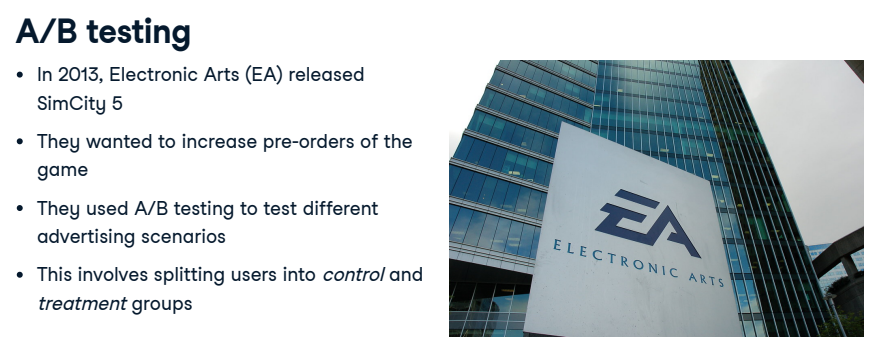

In 2013, Electronic Arts, or EA, launched a video game called SimCity 5. Leading up to its release, they wanted to increase pre-order sales. They used an experimental design technique called A/B testing, which has roots in hypothesis testing, to test different advertising scenarios and see which improved sales the most. Website visitors were split into a control group and a treatment group. Each group saw a different version of the game's pre-order sales page.

3. Retail webpage A/B test

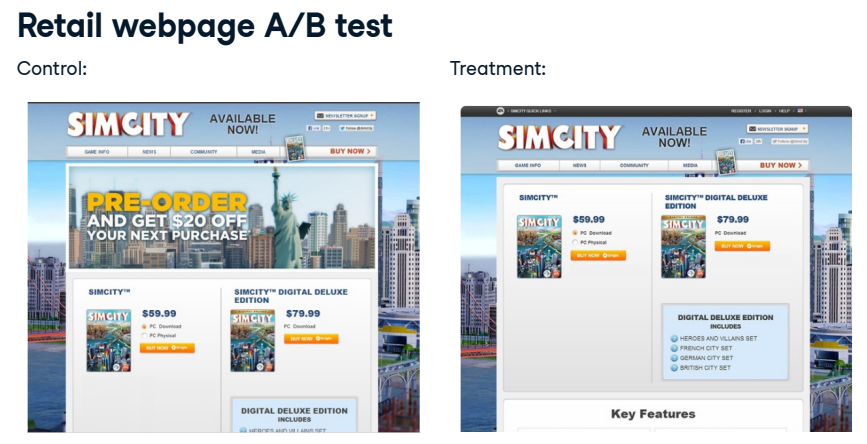

Here's each version of the SimCity 5 pre-order page. The control group saw the version with a banner advertising money off their next purchase with each pre-order. The treatment group saw the version without the banner. EA compared the percentage of checkouts for the two groups to see which performed best. Our naive guess would be that the advertisement increased pre-order sales.

4. A/B test results

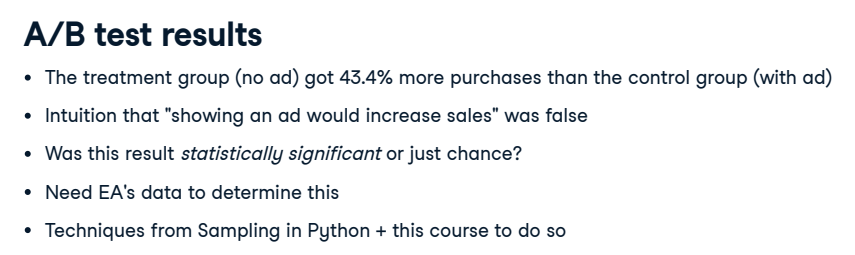

The results of the A/B test were surprising. The treatment page without the advertisement resulted in 43 percent higher sales than the control page with the advert. The experiment proved that our intuition that more discount adverts would result in more sales was false. We might ask ourselves, was the 43 percent difference a meaningful difference between the control and treatment groups, or was it just random chance? To get this answer, we'd need the original dataset from EA, which isn't publicly available. However, the method to answering this question of significance would involve techniques from both the Sampling in Python course and from this course.

5. Stack Overflow Developer Survey 2020

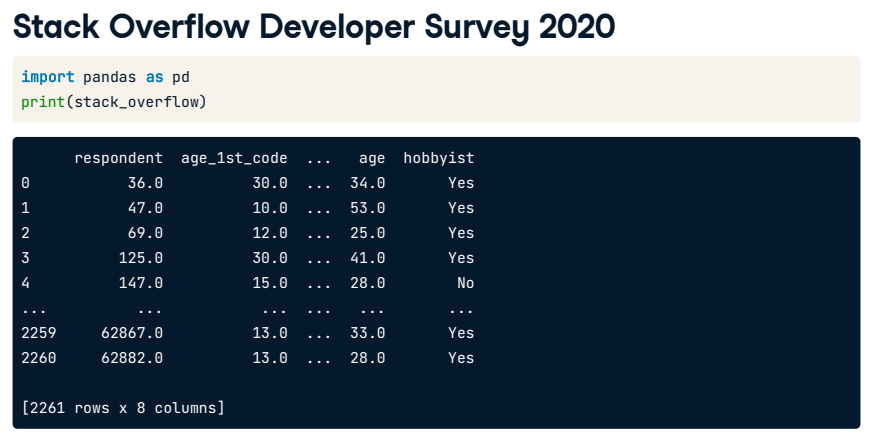

Each year, Stack Overflow surveys its users, who are primarily software developers, about themselves, how they use Stack Overflow, their work, and the development tools they use. In this course, we'll look at a subset of the survey responses from users who identified as Data Scientists.

6. Hypothesizing about the mean

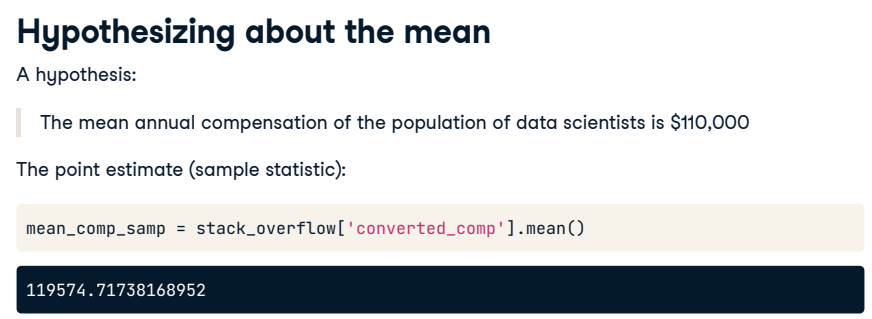

Let's hypothesize that the mean annual compensation of the population of data scientists is 110,000 dollars. We can initially examine the mean annual compensation from the sample survey data. Annual compensation, converted to dollars, is stored in the converted_comp column. The sample mean is a type of point estimate, which is another name for a summary statistic. We can calculate it with pandas using the dot-mean method on the converted_comp Series. The result is different from our hypothesis, but is it meaningfully different?

7. Generating a bootstrap distribution

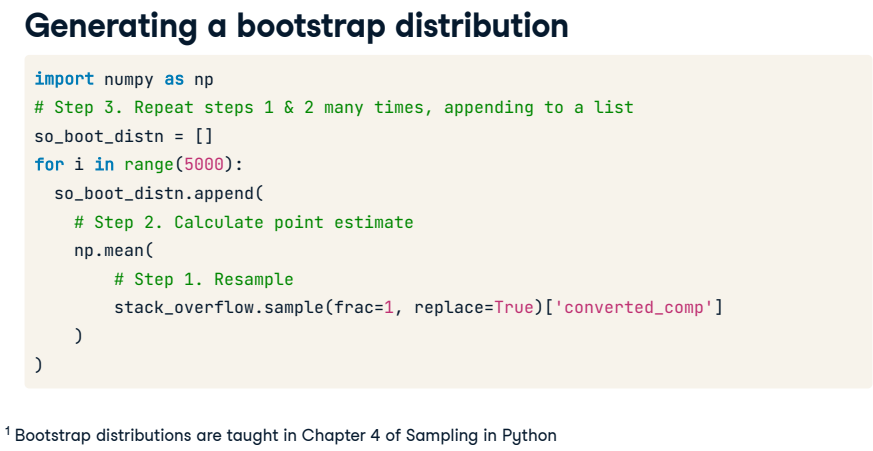

To answer this, we need to generate a bootstrap distribution of sample means. This is done by resampling the dataset, calculating the sample mean for that resample, then repeating those steps to create a list of sample means.

1 Bootstrap distributions are taught in Chapter 4 of Sampling in Python

8. Visualizing the bootstrap distribution

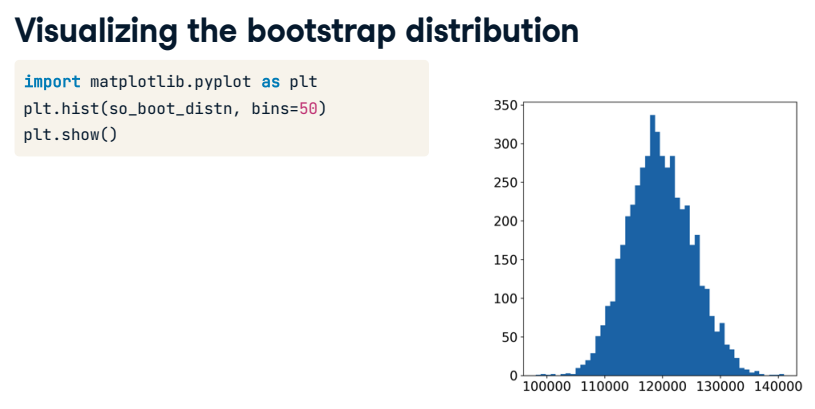

Here's a histogram of the bootstrap distribution. Its bell shape means that it's roughly normally distributed. Notice that 110,000 is on the left of the distribution.

9. Standard error

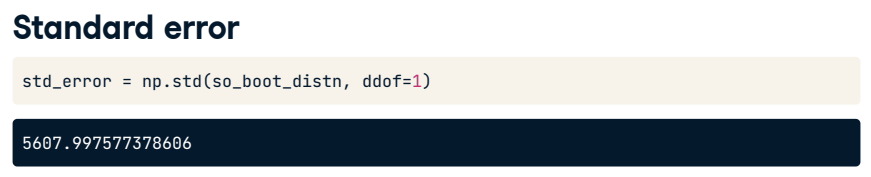

Recall that the standard deviation of the sample statistics in the bootstrap distribution estimates the standard error of the statistic.

10. z-scores

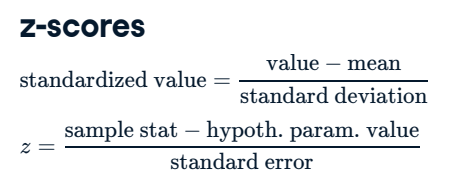

Since variables have arbitrary units and ranges, before we test our hypothesis, we need to standardize the values. A common way of standardizing values is to subtract the mean, and divide by the standard deviation. For hypothesis testing, we use a variation where we take the sample statistic, subtract the hypothesized parameter value, and divide by the standard error. The result is called a z-score.

11. z-scores

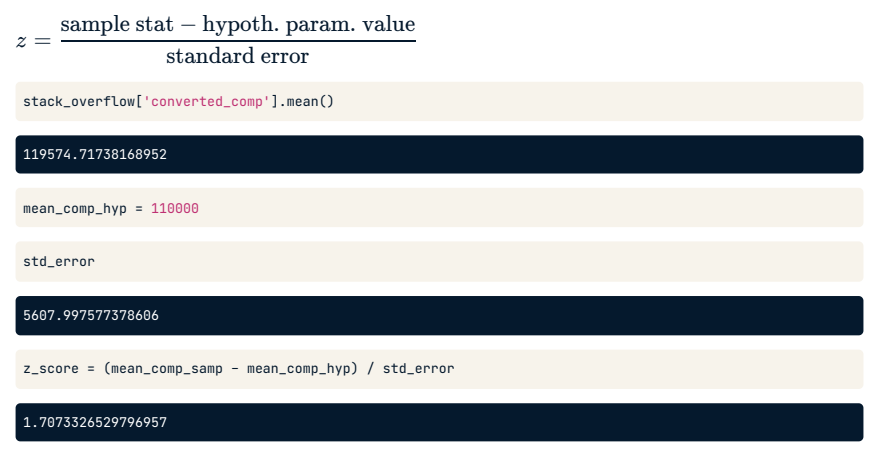

Here are the values we calculated earlier. The sample mean annual compensation for data scientists of around 120,000 dollars, minus the hypothesized compensation of 110,000, divided by the standard error gives a z-score of one-point-seven-zero-seven.

12. Testing the hypothesis

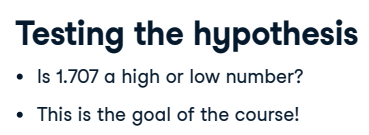

Is that a big or small number? Determining that is the goal of this course.

13. Testing the hypothesis

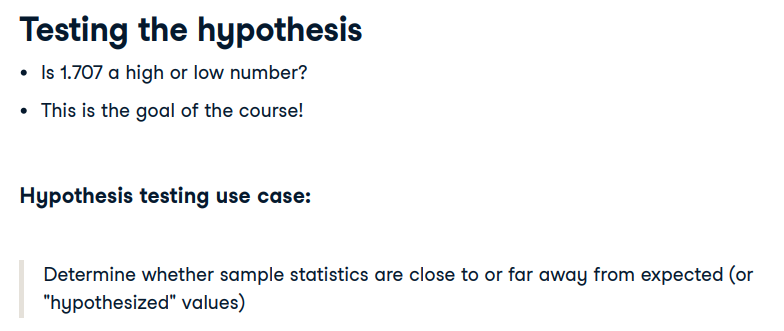

In particular, we can now state one of the uses of hypothesis testing: determining whether a sample statistic is close to or far away from an expected value.

14. Standard normal (z) distribution

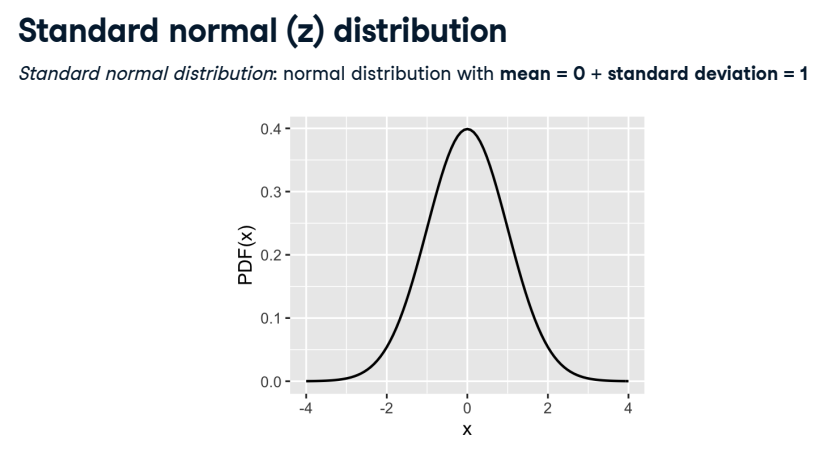

One final thing. Here's a plot of the probability density function for the standard normal distribution, which is a normal distribution with mean of zero and standard deviation of one. It's often called the z-distribution, and z-scores are related to this distribution. We'll encounter the z-distribution throughout this course.

15. Let's practice!

Time to begin!

**Uses of A/B testing**

In the video, you saw how Electronic Arts used A/B testing on their website when launching SimCity 5. One version of the page showed an advertisement for a discount, and one version did not. Half the users saw one version of the page, and the other half saw the second version of the page.

- What is the main reason to use an A/B test?

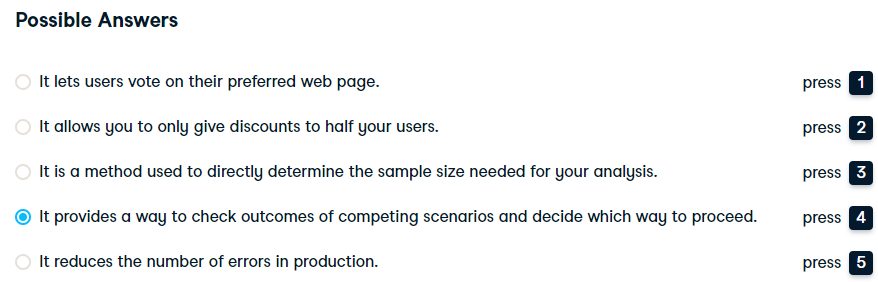

Ace A/B testing! A/B testing lets you compare scenarios to see which best achieves some goal.

**Exercise**

**Calculating the sample mean**

The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

You'll begin your analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In pandas, a value's proportion in a categorical DataFrame column can be quickly calculated using the syntax:

prop = (df['col'] == val).mean()

late_shipments is available, and pandas is loaded as pd.

**Instructions**

- Print the late_shipments dataset.

- Calculate the proportion of late shipments in the sample; that is, the mean cases where the late column is "Yes".

In [117]:
late_shipments = shipments.copy()

In [118]:
# Print the late_shipments dataset
print(late_shipments)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

In [119]:
# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Print the results
print(late_prop_samp)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

Cool calculating! The proportion of late shipments in the sample is 0.061, or 6.1%.

**Exercise**

**Calculating a z-score**

Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

The sample statistic is available as late_prop_samp.

late_shipments_boot_distn is a bootstrap distribution of the proportion of late shipments, available as a list.

pandas and numpy are loaded with their usual aliases.

**Instructions**

- Hypothesize that the proportion of late shipments is 6%.
- Calculate the standard error from the standard deviation of the bootstrap distribution.
- Calculate the z-score.

In [120]:
late_prop_samp

0.061

In [121]:
(late_shipments.sample(frac=1, replace=True)['late']=='Yes').mean()

0.052

In [122]:
(late_shipments['late'] == "Yes").mean()

0.061

In [123]:
late_shipments_boot_distn = []
for i in range(5000):
    late_shipments_boot_distn.append(
        np.mean(late_shipments.sample(frac=1, replace=True)['late']=='Yes'))
    
# Print the result
print(late_shipments_boot_distn)

[0.046, 0.051, 0.069, 0.057, 0.069, 0.05, 0.059, 0.064, 0.057, 0.066, 0.063, 0.075, 0.055, 0.057, 0.06, 0.048, 0.051, 0.045, 0.058, 0.058, 0.059, 0.054, 0.086, 0.06, 0.054, 0.049, 0.056, 0.064, 0.067, 0.054, 0.051, 0.051, 0.063, 0.056, 0.062, 0.065, 0.069, 0.07, 0.064, 0.057, 0.061, 0.059, 0.064, 0.049, 0.06, 0.051, 0.065, 0.061, 0.053, 0.049, 0.054, 0.048, 0.053, 0.052, 0.057, 0.056, 0.056, 0.049, 0.063, 0.063, 0.058, 0.048, 0.057, 0.066, 0.062, 0.061, 0.049, 0.067, 0.054, 0.066, 0.066, 0.059, 0.063, 0.043, 0.055, 0.056, 0.069, 0.054, 0.068, 0.062, 0.043, 0.061, 0.069, 0.067, 0.067, 0.051, 0.064, 0.048, 0.066, 0.048, 0.054, 0.06, 0.062, 0.059, 0.076, 0.067, 0.061, 0.047, 0.062, 0.054, 0.061, 0.051, 0.055, 0.075, 0.063, 0.064, 0.064, 0.059, 0.067, 0.063, 0.064, 0.052, 0.075, 0.058, 0.06, 0.065, 0.073, 0.053, 0.054, 0.069, 0.069, 0.068, 0.057, 0.06, 0.055, 0.062, 0.065, 0.068, 0.055, 0.064, 0.066, 0.056, 0.056, 0.065, 0.061, 0.06, 0.066, 0.065, 0.06, 0.068, 0.058, 0.05, 0.052, 0.061, 0.

In [124]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
print(z_score)

0.130217170600655


Zesty z-scoring! The z-score is a standardized measure of the difference between the sample statistic and the hypothesized statistic.

### 1 02 p-values

1. p-values

Hypothesis tests are like criminal trials.

2. Criminal trials

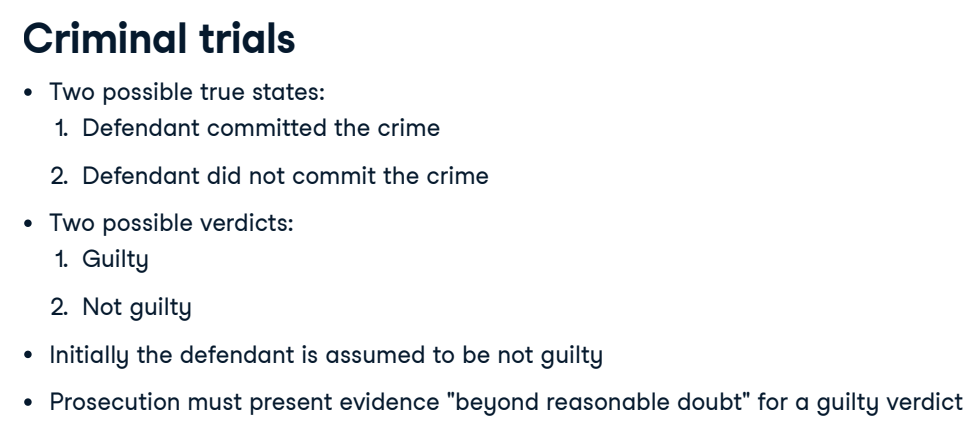

There are two possible true states: the defendant either committed the crime, or didn't. There are also two possible outcomes: a guilty or not guilty verdict. The initial assumption is that the defendant is not guilty, and the prosecution team must present evidence beyond a reasonable doubt that the defendant committed the crime for a guilty verdict to be given.

3. Age of first programming experience

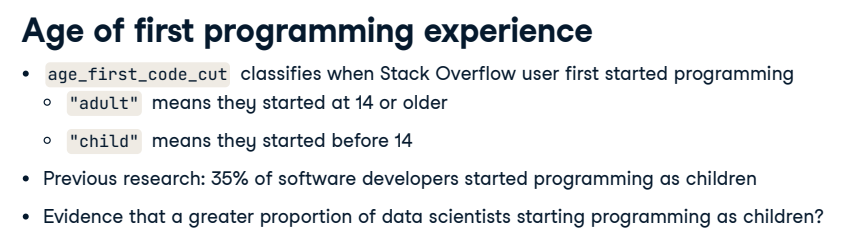

Let's return to the Stack Overflow survey. The age_first_code_cut variable classifies when the user began programming. If they were 14 or older, they are classified as adult; otherwise, child. Suppose previous research suggests that 35 percent of software developers programmed as children. This raises a question answerable with our dataset. Does our sample provide evidence that a greater proportion of data scientists started programming as children?

4. Definitions

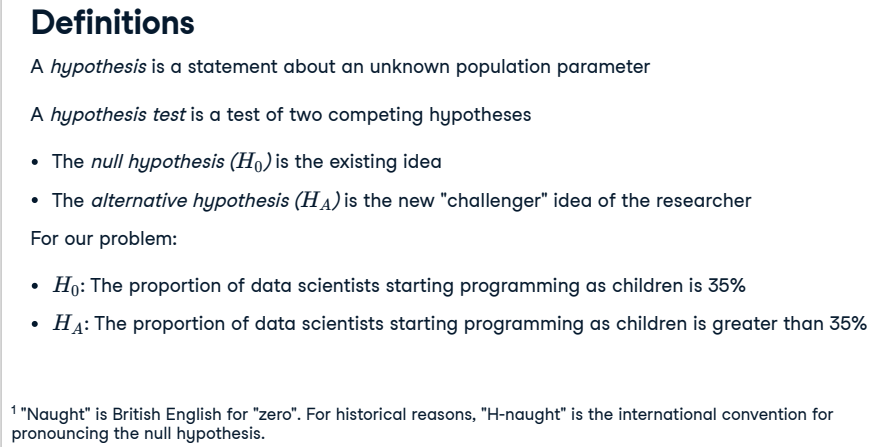

Let's specify some definitions. A hypothesis is a statement about a population parameter. We don't know the true value of this population parameter; we can only make inferences about it from the data. Hypothesis tests compare two competing hypotheses. These two hypotheses are the null hypothesis, representing the existing idea, and the alternative hypothesis, representing a new idea that challenges the existing one. They are denoted H-naught and H-A, respectively. Here, the null hypothesis is that the proportion of data scientists that started programming as children follows the research on software developers, at 35 percent. The alternative hypothesis is that the percentage is greater than 35.

1 "Naught" is British English for "zero". For historical reasons, "H-naught" is the international convention for pronouncing the null hypothesis.

5. Criminal trials vs. hypothesis testing

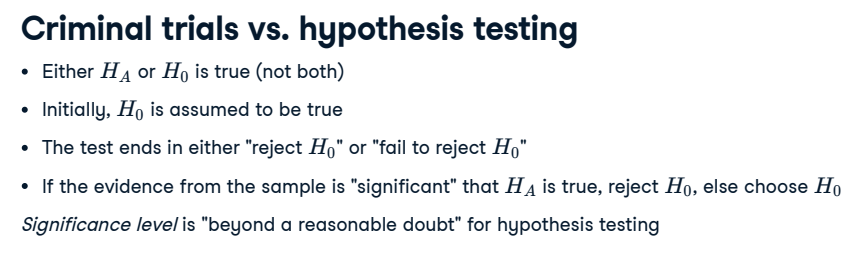

Returning to our criminal trial comparison, the defendant can be either guilty or not guilty, and likewise, only one of the hypotheses can be true. Initially, the defendant is assumed to be not guilty and, similarly, we initially assume that the null hypothesis is true. This only changes if the sample provides enough evidence to reject it. Rather than saying we accept the alternative hypothesis, it is convention to refer to rejecting the null hypothesis, or failing to reject the null hypothesis. If the evidence is "beyond a reasonable doubt" that the defendant committed the crime, then a "guilty" verdict is given. The hypothesis testing equivalent of "beyond a reasonable doubt" is known as the significance level - more on this later in the chapter.

6. One-tailed and two-tailed tests

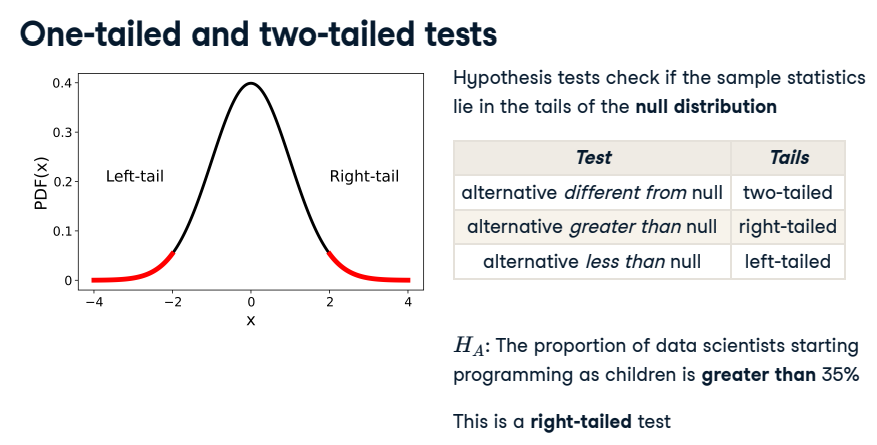

The tails of a distribution are the left and right edges of its PDF. Hypothesis tests determine whether the sample statistics lie in the tails of the null distribution, which is the distribution of the statistic if the null hypothesis was true. There are three types of tests, and the phrasing of the alternative hypothesis determines which type we should use. If we are checking for a difference compared to a hypothesized value, we look for extreme values in either tail and perform a two-tailed test. If the alternative hypothesis uses language like "less" or "fewer", we perform a left-tailed test. Words like "greater" or "exceeds" correspond to a right-tailed test. For the Stack Overflow hypothesis test, we need a right-tailed test since we are looking for extreme values in the right tail.

7. p-values

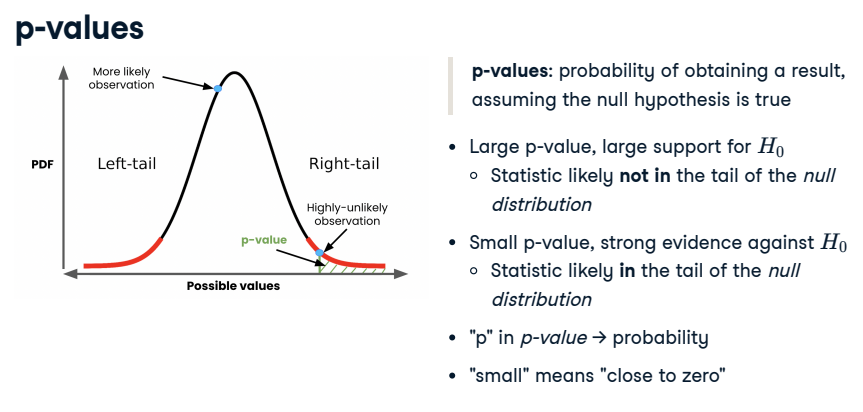

p-values measure the strength of support for the null hypothesis, or in other words, they measure the probability of obtaining a result, assuming the null hypothesis is true. Large p-values mean our statistic is producing a result that is likely not in a tail of our null distribution, and chance could be a good explanation for the result. Small p-values mean our statistic is producing a result likely in the tail of our null distribution. Because p-values are probabilities, they are always between zero and one.

8. Calculating the z-score

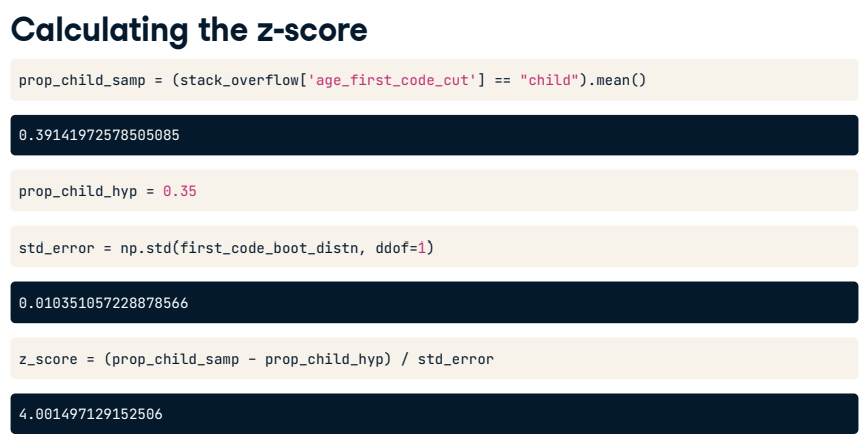

To calculate the p-value, we must first calculate the z-score. We calculate the sample statistic, in this case the proportion of data scientists who started programming as children. The hypothesized value from the null hypothesis is 35 percent. We get the standard error from the standard deviation of the bootstrap distribution, and the z-score is the difference between the proportions, divided by the standard error.

9. Calculating the p-value

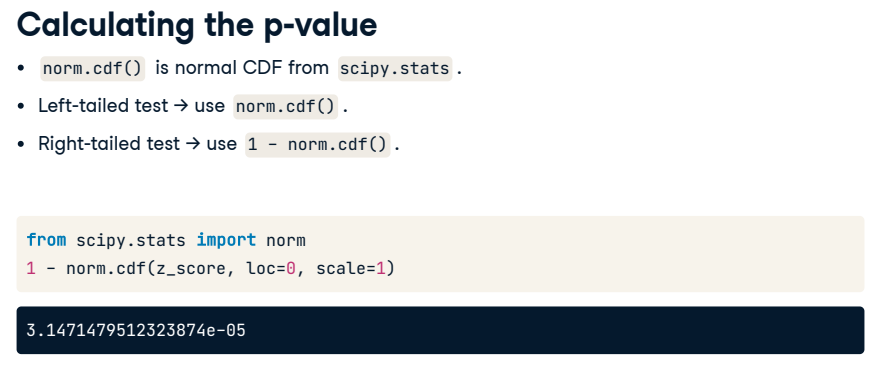

We pass the z-score to the standard normal CDF, norm-dot-cdf, from scipy-dot-stats with the default values of mean zero and standard deviation of one. As we're performing a right-tail test, not a left-tail test, the p-value is calculated by taking one minus the norm-dot-cdf result. The p-value is three out of 100,000.

10. Let's practice!

Go calculate some p-values!

**Criminal trials and hypothesis tests**

In the video, you saw how hypothesis testing follows a similar process to criminal trials.

- Which of the following correctly matches up a criminal trial with properties of a hypothesis test?

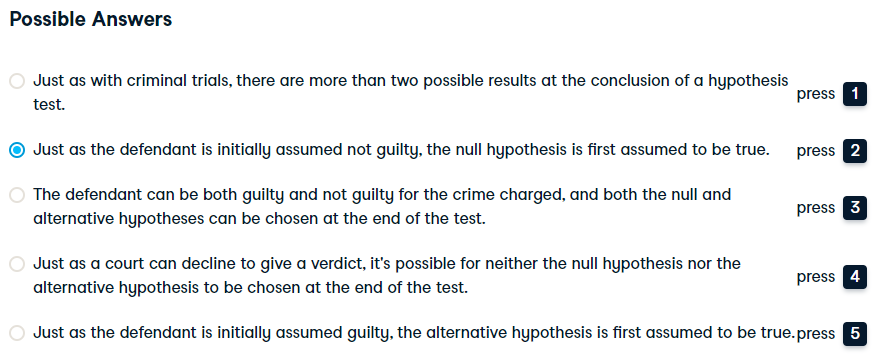

I pronounce you not guilty! It's sometimes helpful to think of your hypothesis test as being a trial of the statistic.

**Exercise**

**Left tail, right tail, two tails**

Hypothesis tests are used to determine whether the sample statistic lies in the tails of the null distribution. However, the way that the alternative hypothesis is phrased affects which tail(s) we are interested in.

**Instructions**

- Determine the appropriate type of hypothesis test for answering these questions.

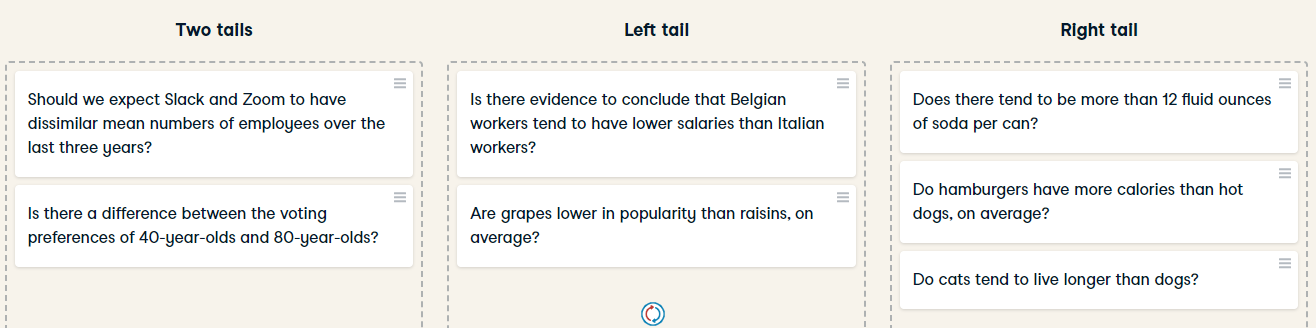

Top tail choices! The tails of the distribution that are relevant depend on whether the alternative hypothesis refers to "greater than", "less than", or "differences between."

**Exercise**

**Calculating p-values**

In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.

You'll now return to the late shipments dataset and the proportion of late shipments.

The null hypothesis, Ho, is that the proportion of late shipments is six percent.

The alternative hypothesis, Ha, is that the proportion of late shipments is greater than six percent.

The observed sample statistic, late_prop_samp, the hypothesized value, late_prop_hyp (6%), and the bootstrap standard error, std_error are available. norm from scipy.stats has also been loaded without an alias.

**Instructions**

- Question : What type of test should be used for this alternative hypothesis?

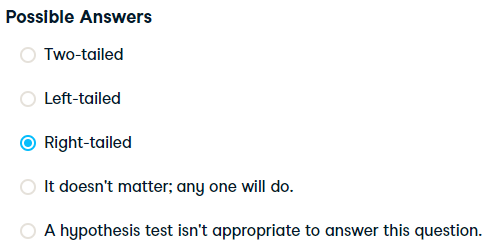

----------

- Calculate the z-score of late_prop_samp.
- Calculate the p-value for the z-score, using a right-tailed test.

In [125]:
late_prop_samp

0.061

In [126]:
late_prop_hyp = 0.06

In [127]:
std_error = np.std(late_shipments_boot_distn, ddof=1)
std_error

0.007679478792138422

In [128]:
from scipy.stats import norm

In [129]:
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 

0.4481973050353555


Perfect p-value! The p-value is calculated by transforming the z-score with the standard normal cumulative distribution function.

### 1 03 Statistical significance

1. Statistical significance

Last time, we introduced p-values.

2. p-value recap

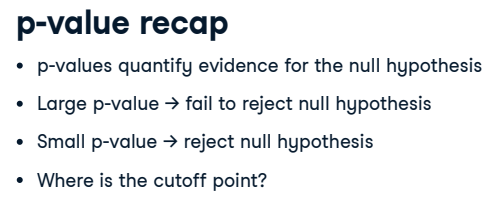

p-values quantify how much evidence there is for the null hypothesis. Large p-values indicate a lack of evidence for the alternative hypothesis, sticking with the assumed null hypothesis instead. Small p-values make us doubt this original assumption in favor of the alternative hypothesis. What defines the cutoff point between a small p-value and a large one?

3. Significance level

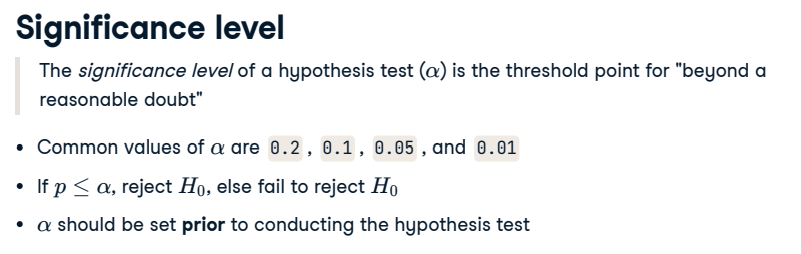

The cutoff point is known as the significance level, and is denoted alpha. The appropriate significance level depends on the dataset and the discipline worked in. Five percent is the most common choice, but ten percent and one percent are also popular. The significance level gives us a decision process for which hypothesis to support. If the p-value is less than or equal to alpha, we reject the null hypothesis. Otherwise, we fail to reject it. It's important that we decide what the appropriate significance level should be before we run our test. Otherwise, there is a temptation to decide on a significance level that lets us choose the hypothesis we want.

4. Calculating the p-value

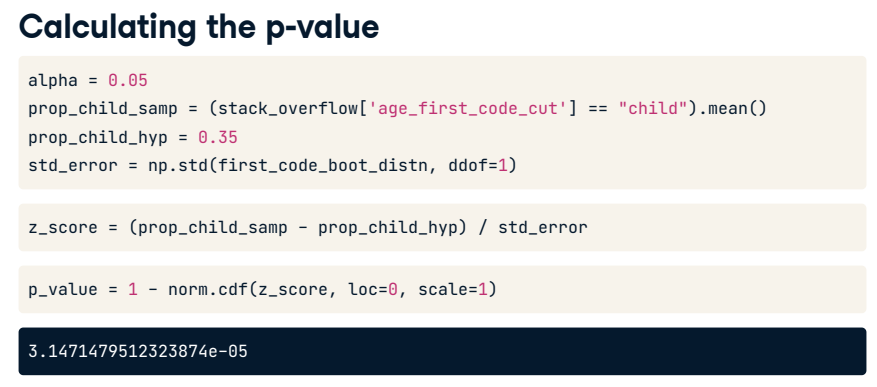

The workflow starts with setting the significance level, in this case point-zero-five. Next, we calculate the sample mean and assign the hypothesized mean. For the z-score, we also need the standard error, which we obtain from the bootstrap distribution. Then we calculate the z-score using the sample mean, hypothesized mean, and standard error, and use the standard normal CDF to get the p-value.

5. Making a decision

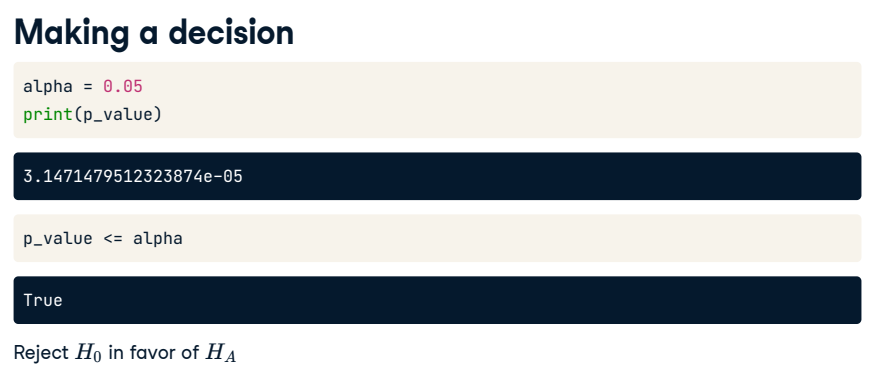

In this case, the p-value of three times ten to the minus five is less than or equal to point-zero-five, so we reject the null hypothesis. We have strong evidence for the alternative hypothesis that the proportion of data scientists that started programming as children is greater than 35 percent.

6. Confidence intervals

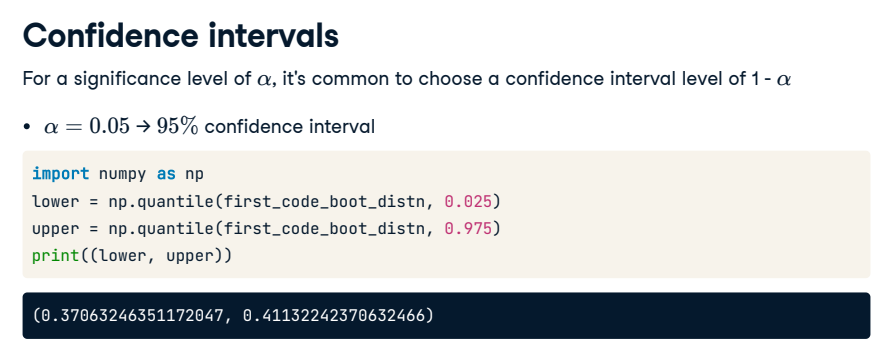

To get a sense of the potential values of the population parameter, it's common to choose a confidence interval level of one minus the significance level. For a significance level of point-zero-five, we'd use a 95 percent confidence interval. Here's the calculation using the quantile method. The interval provides a range of plausible values for the population proportion of data scientists that programmed as children.

7. Types of errors

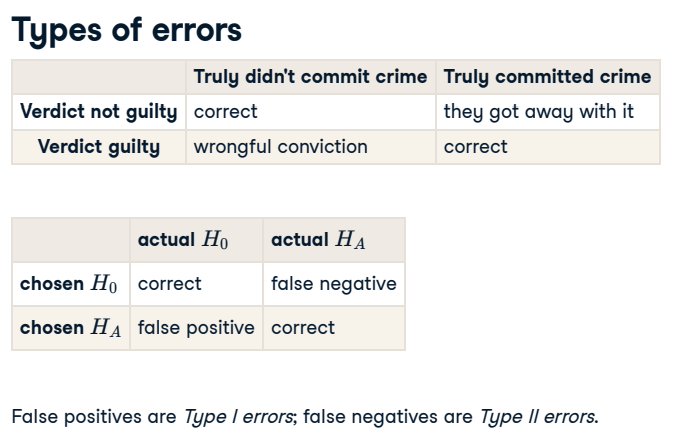

Returning to the criminal trial analogy, there are two possible truth states and two possible test outcomes, amounting to four combinations. Two of these indicate that the verdict was correct. If the defendant didn't commit the crime, but the verdict was guilty, they are wrongfully convicted. If the defendant committed the crime, but the verdict was not guilty, they got away with it. These are both errors in justice. Similarly, for hypothesis testing, there are two ways to get it right, and two types of error. If we support the alternative hypothesis when the null hypothesis was correct, we made a false positive error. If we support the null hypothesis when the alternative hypothesis was correct, we made a false negative error. These errors are sometimes known as type one and type two errors, respectively.

8. Possible errors in our example

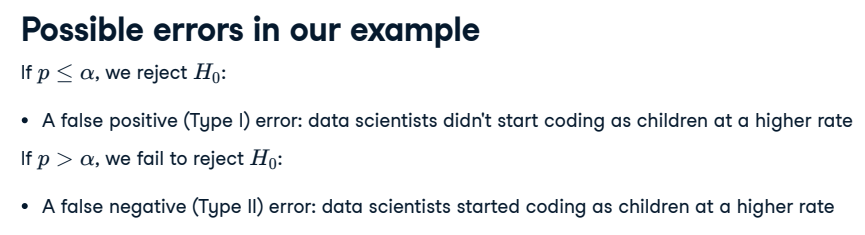

In the case of data scientists coding as children, if we had a p-value less than or equal to the significance level, and rejected the null hypothesis, it's possible we made a false positive error. Although we thought data scientists started coding as children at a higher rate, it may not be true in the whole population. Conversely, if the p-value was greater than the significance level, and we failed to reject the null hypothesis, it's possible we made a false negative error.

9. Let's practice!

Let's do some significant exercises.

**Decisions from p-values**

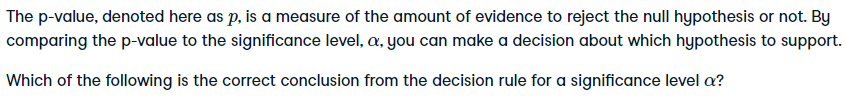

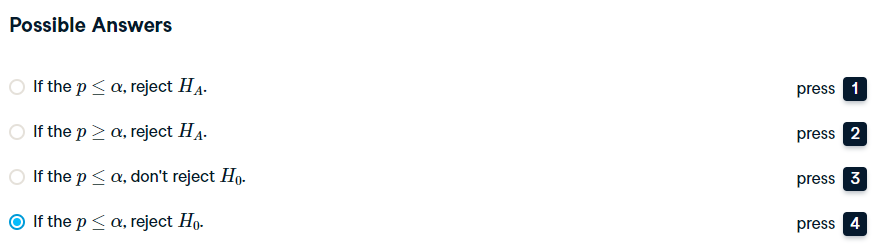

Delightful decision-making. If the p-value is less than or equal to the significance level, you reject the null hypothesis.

**Exercise**

**Calculating a confidence interval**

If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

Sampling in Python demonstrated two methods for calculating confidence intervals. Here, you'll use quantiles of the bootstrap distribution to calculate the confidence interval.

late_prop_samp and late_shipments_boot_distn are available; pandas and numpy are loaded with their usual aliases.

**Instructions**

- Calculate a 95% confidence interval from late_shipments_boot_distn using the quantile method, labeling the lower and upper intervals lower and upper.
----------
- Question : Does the confidence interval match up with the conclusion to stick with the original assumption that 6% is a reasonable value for the unknown population parameter?

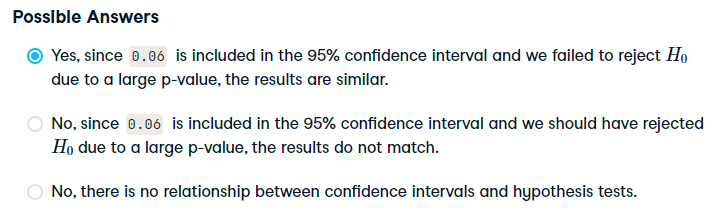

In [130]:
late_prop_samp

0.061

In [131]:
late_shipments_boot_distn

[0.046,
 0.051,
 0.069,
 0.057,
 0.069,
 0.05,
 0.059,
 0.064,
 0.057,
 0.066,
 0.063,
 0.075,
 0.055,
 0.057,
 0.06,
 0.048,
 0.051,
 0.045,
 0.058,
 0.058,
 0.059,
 0.054,
 0.086,
 0.06,
 0.054,
 0.049,
 0.056,
 0.064,
 0.067,
 0.054,
 0.051,
 0.051,
 0.063,
 0.056,
 0.062,
 0.065,
 0.069,
 0.07,
 0.064,
 0.057,
 0.061,
 0.059,
 0.064,
 0.049,
 0.06,
 0.051,
 0.065,
 0.061,
 0.053,
 0.049,
 0.054,
 0.048,
 0.053,
 0.052,
 0.057,
 0.056,
 0.056,
 0.049,
 0.063,
 0.063,
 0.058,
 0.048,
 0.057,
 0.066,
 0.062,
 0.061,
 0.049,
 0.067,
 0.054,
 0.066,
 0.066,
 0.059,
 0.063,
 0.043,
 0.055,
 0.056,
 0.069,
 0.054,
 0.068,
 0.062,
 0.043,
 0.061,
 0.069,
 0.067,
 0.067,
 0.051,
 0.064,
 0.048,
 0.066,
 0.048,
 0.054,
 0.06,
 0.062,
 0.059,
 0.076,
 0.067,
 0.061,
 0.047,
 0.062,
 0.054,
 0.061,
 0.051,
 0.055,
 0.075,
 0.063,
 0.064,
 0.064,
 0.059,
 0.067,
 0.063,
 0.064,
 0.052,
 0.075,
 0.058,
 0.06,
 0.065,
 0.073,
 0.053,
 0.054,
 0.069,
 0.069,
 0.068,
 0.057,
 0.06,
 0.055,
 0.062,


In [132]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.047, 0.077)


Cool and confident! When you have a confidence interval width equal to one minus the significance level, if the hypothesized population parameter is within the confidence interval, you should fail to reject the null hypothesis.

**Exercise**

**Type I and type II errors**

For hypothesis tests and for criminal trials, there are two states of truth and two possible outcomes. Two combinations are correct test outcomes, and there are two ways it can go wrong.

The errors are known as false positives (or "type I errors"), and false negatives (or "type II errors").

**Instructions**

- Match the scenarios to the appropriate error type, or to "Not an error" for correct decisions.

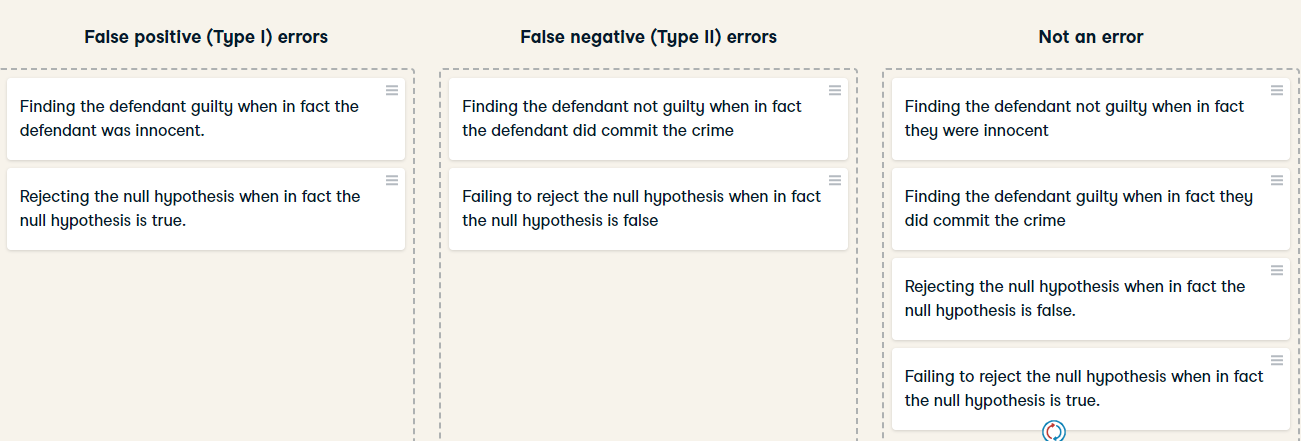

Distinguished decision-making! There are two ways to get the right decision, and two different ways you can make the wrong decision.

## <a id="2"></a>
<font color="lightseagreen" size=+2.5><b>2. Two-Sample and ANOVA Tests</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In this chapter, you’ll learn how to test for differences in means between two groups using t-tests and extend this to more than two groups using ANOVA and pairwise t-tests.

### 2 01 Performing t-tests

1. Performing t-tests

In the previous chapter, we calculated the z-score, which was a test statistic for a single variable.

2. Two-sample problems

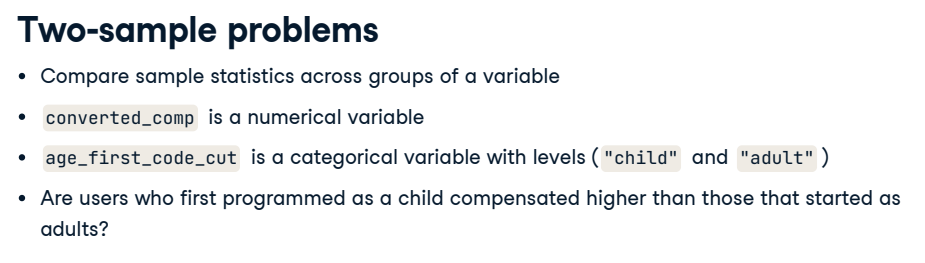

Here, we'll look at a related problem of comparing sample statistics across groups in a variable. In the Stack Overflow dataset, converted_comp is a numerical variable of annual compensation. age_first_code_cut is a categorical variable with two levels: child and adult, which describe when the user started programming. We can ask questions about differences in compensation across the two age groups, such as, are users who first programmed as a child better compensated than those that started as adults?

3. Hypotheses

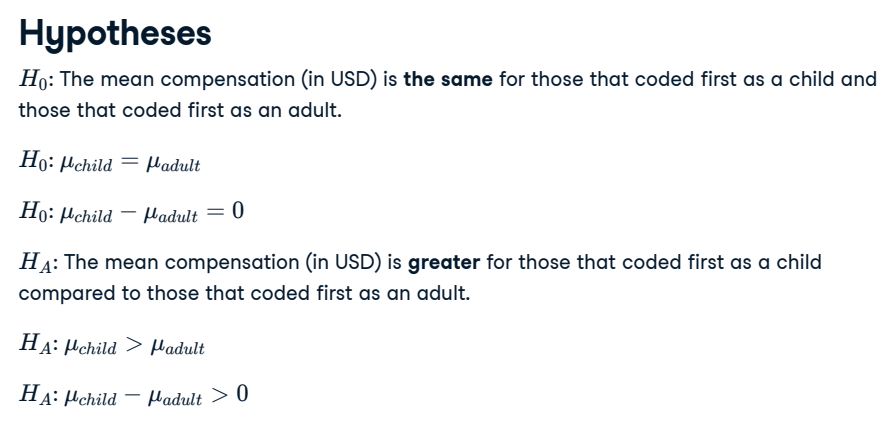

The null hypothesis is that the population mean for the two groups is the same, and the alternative hypothesis is that the population mean for users who started coding as children is greater than for users who started coding as adults. We can write these hypotheses using equations. Mu represents an unknown population mean, and we use subscripts to denote which group the population mean belongs to. An alternate way of writing the equations is to compare the differences in population means to zero. Zero here corresponds to our hypothesized value for the difference in means.

4. Calculating groupwise summary statistics

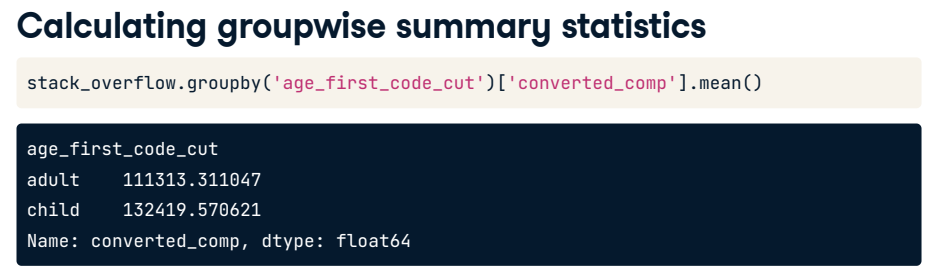

To calculate summary statistics for each group, we start with the sample, group by the categorical variable, and then compute on the numeric variable. A pandas way of doing this is shown, calculating the mean of the converted_comp column after grouping by age_first_code_cut. Here, the child programmers have a mean compensation of 132,000 dollars compared to around 111,000 for adult programmers. Is that increase statistically significant or could it be explained by sampling variability?

5. Test statistics

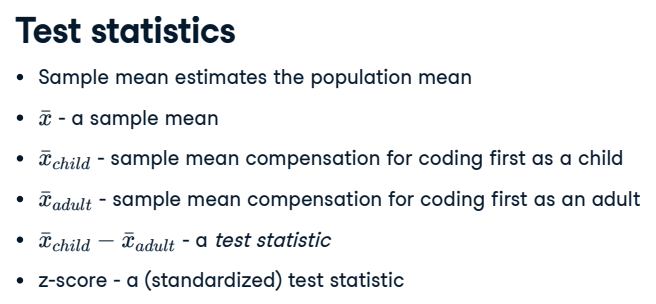

Although we don't know the population mean, we estimate it using the sample mean. x-bar is used to denote a sample mean. Then we use subscripts to denote which group a sample mean corresponds to. The difference between these two sample means is the test statistic for the hypothesis test. The z-scores we saw in Chapter 1 are a type of standardized test statistic.

6. Standardizing the test statistic

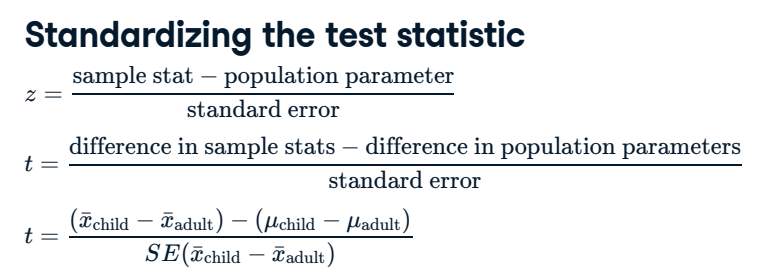

z-scores are calculated by taking the sample statistic, subtracting the mean of this statistic as the population parameter of interest, then dividing by the standard error. In the two sample case, the test statistic, denoted t, uses a similar equation. We take the difference between the sample statistics for the two groups, subtract the population difference between the two groups, then divide by the standard error.

7. Standard error

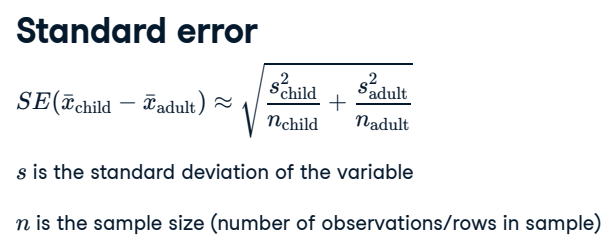

To calculate the standard error, needed for the denominator of the test statistic equation, bootstrapping tends to be a good option. However, there is an easier way to approximate it. We calculate the standard deviation of the numeric variable for each group in the sample, and the number of observations in each group. Then enter those values into the equation and compute the result.

8. Assuming the null hypothesis is true

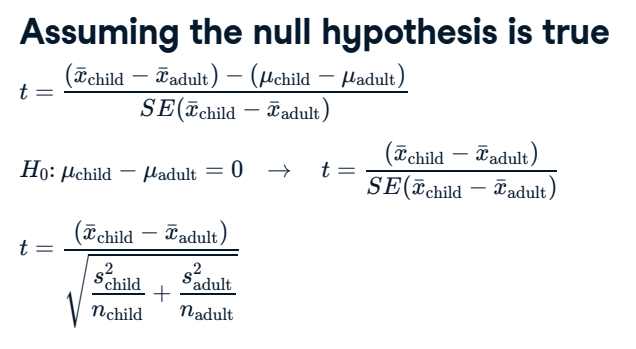

Here's the test statistic equation again. If we assume that the null hypothesis is true, there's a simplification we can make. The null hypothesis assumes that the population means are equal, and their difference is zero, so the population term in the numerator disappears. Inserting the approximation for the standard error, we now have a way of calculating the test statistic using only calculations on the sample dataset.

9. Calculations assuming the null hypothesis is true

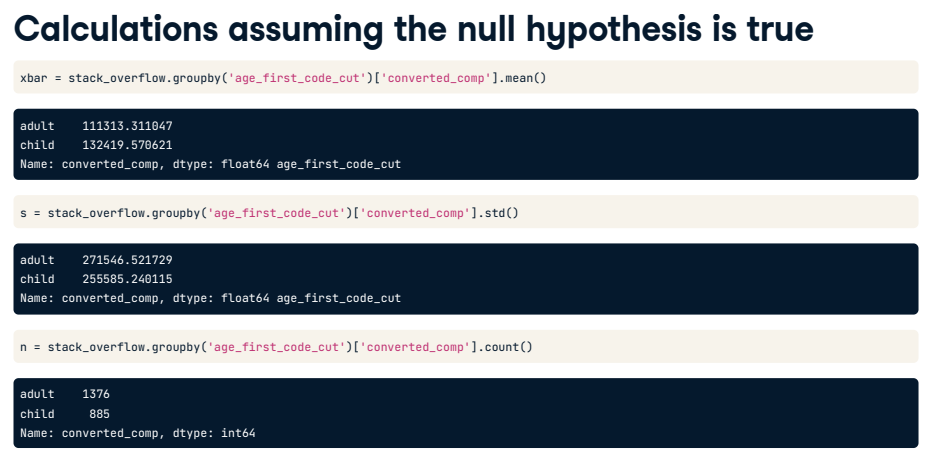

We need the mean, standard deviation, and number of observations for each group to fill in the formula for t. We again use groupby and method combinations with mean, std, and count.

10. Calculating the test statistic

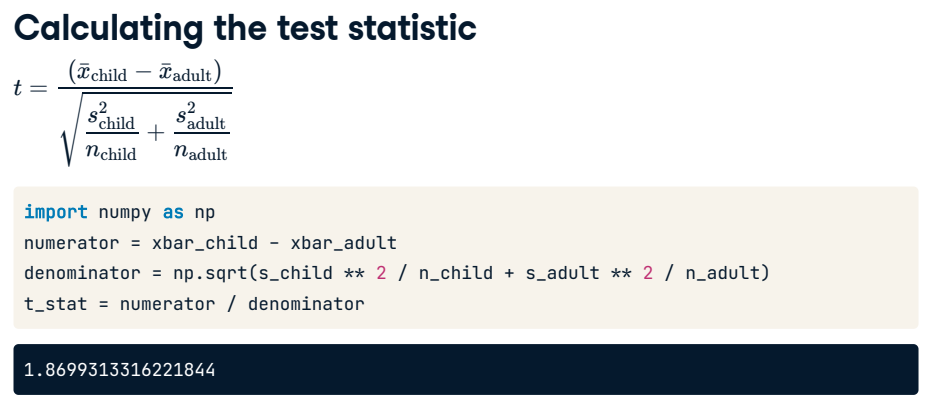

Assigning the values to six different variables, the numerator is a subtraction of the sample means, and the denominator is like a weighted hypotenuse. The t-statistic is around one-point-eight-seven. Just as with z-scores, we can't draw any conclusions yet; for that, we'll need to wait for the next video.

11. Let's practice!

In the mean time, let's calculate some test statistics.

**Exercise**

**Hypothesis testing workflow**

You've seen the hypothesis testing workflow for the one sample case where you compared a sample mean to a hypothesized value, and the two sample case where you compared two sample means. In both cases, the workflow shares common steps.

**Instructions**

- Place the hypothesis testing workflow steps in order from first to last.

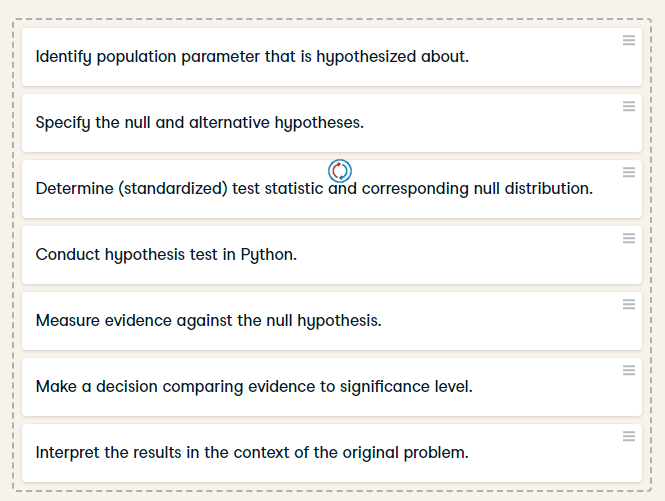

Wild workflow! Regardless of the type of hypothesis test you are performing, it will have a workflow that follows this format.

**Exercise**

**Two sample mean test statistic**

The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.

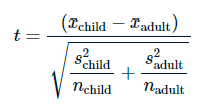

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

The sample means for the two groups are available as xbar_no and xbar_yes. The sample standard deviations are s_no and s_yes. The sample sizes are n_no and n_yes. numpy is also loaded as np.

**Instructions**

- Calculate the numerator of the t test statistic.
- Calculate the denominator of the t test statistic.
- Use those two numbers to calculate the t test statistic.

In [133]:
late_shipments.head(3)

id   country managed_by  fulfill_via vendor_inco_term shipment_mode  \
0  36203.0   Nigeria   PMO - US  Direct Drop              EXW           Air   
1  30998.0  Botswana   PMO - US  Direct Drop              EXW           Air   
2  69871.0   Vietnam   PMO - US  Direct Drop              EXW           Air   

   late_delivery late product_group sub_classification  ...  \
0            1.0  Yes          HRDT           HIV test  ...   
1            0.0   No          HRDT           HIV test  ...   
2            0.0   No           ARV              Adult  ...   

  line_item_quantity line_item_value pack_price unit_price  \
0             2996.0        266644.0       89.0       0.89   
1               25.0           800.0       32.0       1.60   
2            22925.0        110040.0        4.8       0.08   

             manufacturing_site first_line_designation  weight_kilograms  \
0       Alere Medical Co., Ltd.                    Yes            1426.0   
1          Trinity Biotech, Plc                    Yes              10.0   
2  Hetero Unit III Hyderabad IN                    Yes            3723.0   

   freight_cost_usd  freight_cost_groups  line_item_insurance_usd  
0          33279.83            expensive                   373.83  
1            559.89           reasonable                     1.72  
2          19056.13            expensive                   181.57  

[3 rows x 27 columns]

In [134]:
xbar_yes = late_shipments[(late_shipments['late'] == "Yes")]['weight_kilograms'].mean()
xbar_yes

2715.6721311475408

In [135]:
xbar_no = late_shipments[(late_shipments['late'] == "No")]['weight_kilograms'].mean()
xbar_no

1897.7912673056444

In [136]:
s_yes = late_shipments[(late_shipments['late'] == "Yes")]['weight_kilograms'].std()
s_yes

2544.688210903328

In [137]:
s_no = late_shipments[(late_shipments['late'] == "No")]['weight_kilograms'].std()
s_no

3154.039507084167

In [138]:
n_yes = len(late_shipments[(late_shipments['late'] == "Yes")]['weight_kilograms'])
n_yes

61

In [139]:
n_no = len(late_shipments[(late_shipments['late'] == "No")]['weight_kilograms'])
n_no

939

In [140]:
# Calculate the numerator of the test statistic
numerator = xbar_yes - xbar_no

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)

2.3936661778766433


t-rrific! When testing for differences between means, the test statistic is called 't' rather than 'z', and can be calculated using six numbers from the samples. Here, the value is about -2.39 or 2.39, depending on the order you calculated the numerator.

### 2 02 Calculating p-values from t-statistics

1. Calculating p-values from t-statistics

In the previous lesson, we calculated the test statistic t.

2. t-distributions

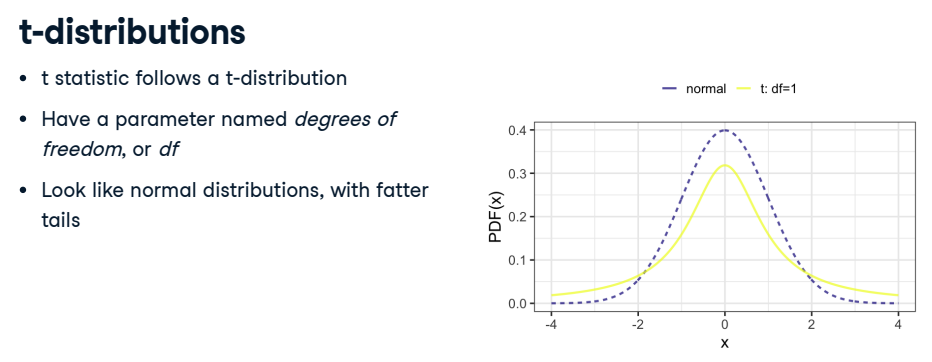

The test statistic, t, follows a t-distribution. t-distributions have a parameter called the degrees of freedom, or df for short. Here's a line plot of the PDF of a t-distribution with one degree of freedom in yellow, and the PDF of a normal distribution in blue dashes. Notice that the t-distribution for small degrees of freedom has fatter tails than the normal distribution, but otherwise they look similar.

3. Degrees of freedom

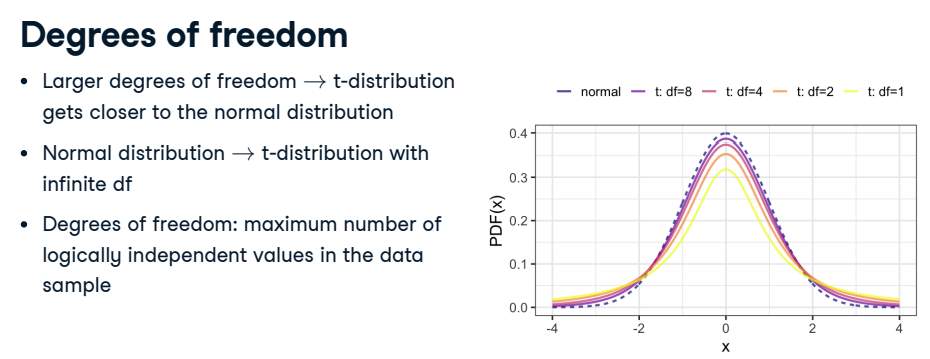

As we increase the degrees of freedom, the t-distribution gets closer to the normal distribution. In fact, a normal distribution is a t-distribution with infinite degrees of freedom. Degrees of freedom are defined as the maximum number of logically independent values in the data sample. That's a fairly tricky concept, so let's try an example.

4. Calculating degrees of freedom

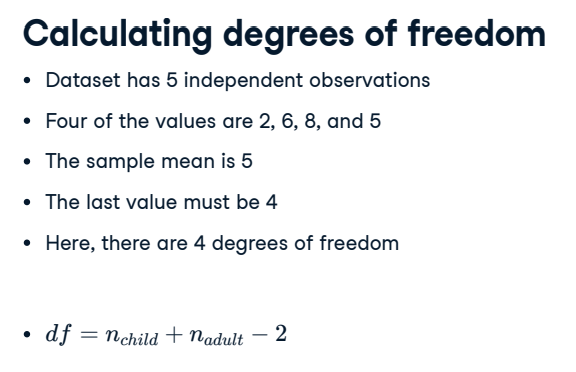

Suppose our dataset has 5 independent observations, and that four of the values are 2, 6, 8, and 5. Suppose we also know the sample mean is 5. With this knowledge, the fifth value is no longer independent; it must be 4. Even though all five observations in the sample were independent, because we know an additional fact about the sample - that is has a mean of 5 - we only have 4 degrees of freedom. In our two sample case, there are as many degrees of freedom as observations, minus two because we know two sample statistics, the means for each group.

5. Hypotheses

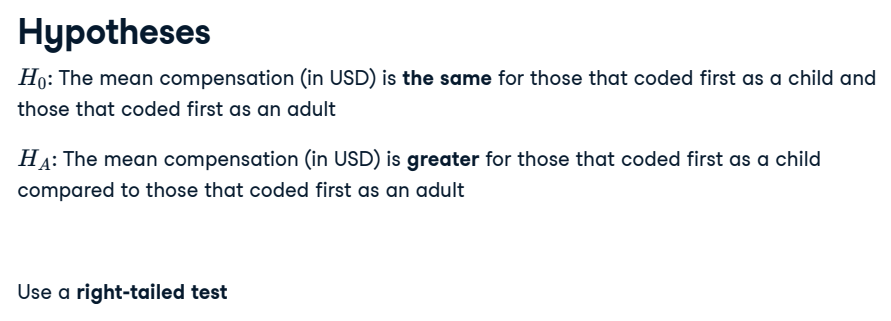

Recall the hypotheses for our Stack Overflow question about compensation for the two age groups. Since this is a "greater than" alternative hypothesis, we need a right-tailed test.

6. Significance level

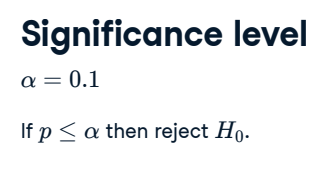

We're going to calculate a p-value in a moment, but we first need to decide on a significance level. There are several possibilities; let's use point-one. That means that we reject the null hypothesis in favor of the alternative if the p-value is less-than-or-equal-to point-one.

7. Calculating p-values: one proportion vs. a value

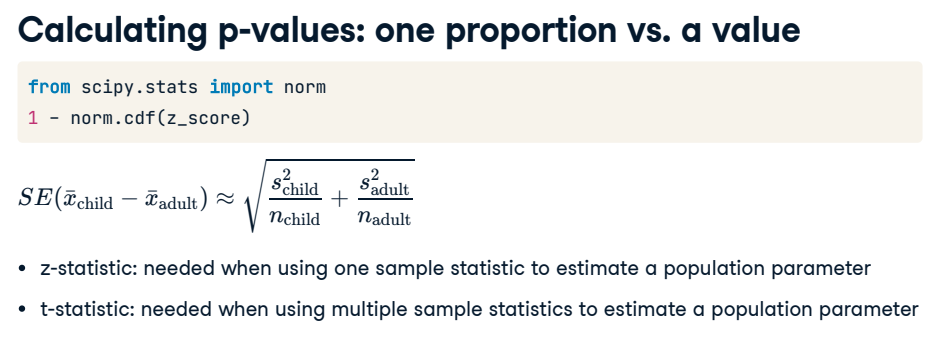

In Chapter 1, to get the p-value, we transformed the z-score with the normal CDF. Since it was a right-tailed test, we subtracted the result from one. In the previous video, we used an approximation for the test statistic standard error using sample information. Using this approximation adds more uncertainty and that's why this is a t instead of a z problem. The t distribution allows for more uncertainty when using multiple estimates in a single statistic calculation. Here, the multiple estimates correspond to the sample mean and the sample standard deviation.

8. Calculating p-values: two means from different groups

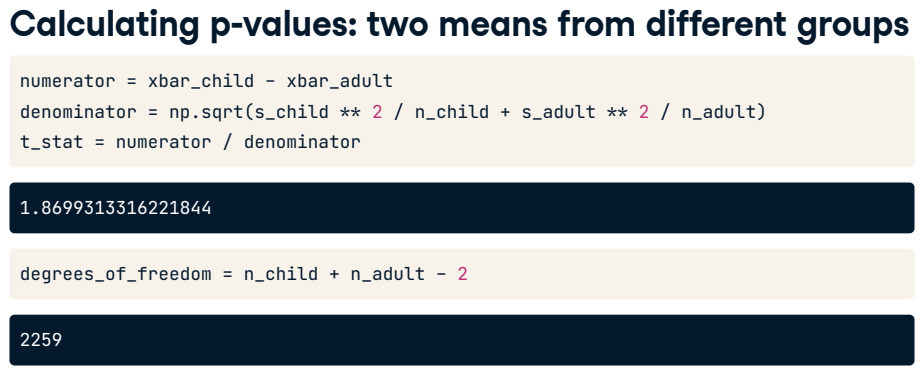

Now we are calculating means rather than proportions, the z-score is replaced with a t test statistic. This is the value calculated in the previous video. The calculation also needs the degrees of freedom, which is the total number of observations in both groups, minus two.

9. Calculating p-values: two means from different groups

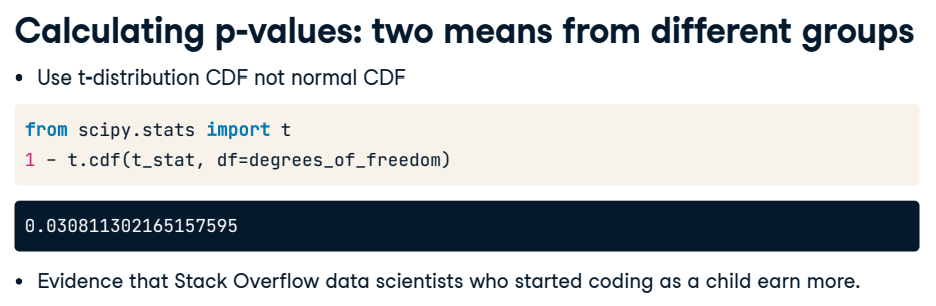

To calculate the p-value, we need to transform the test statistic using the t-distribution CDF instead of the normal distribution CDF. Notice the use of t-dot-cdf instead of norm-dot-cdf, and that the df argument is set to the degrees of freedom. This p-value is less than the significance level of point-one, so we should reject the null hypothesis in favor of the alternative hypothesis that Stack Overflow data scientists who started coding as children earn more.

10. Let's practice!

While I reevaluate my own childhood and wonder why I didn't start programming earlier, time for you to do some exercises.

**Why is t needed?**

The process for calculating p-values is to start with the sample statistic, standardize it to get a test statistic, then transform it via a cumulative distribution function. In Chapter 1, that final transformation was denoted z, and the CDF transformation used the (standard normal) z-distribution. In the last video, the test statistic was denoted t, and the transformation used the t-distribution.

In which hypothesis testing scenario is a t-distribution needed instead of the z-distribution?

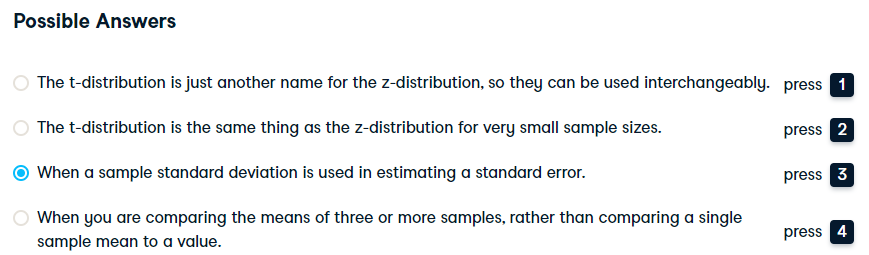

Terrific t! Using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping. However, to correct for the approximation, you need to use a t-distribution when transforming the test statistic to get the p-value.

**Exercise**

**The t-distribution**

The t-distribution is used to calculate the p-value from the t test statistic, and having a sense of how the PDF and CDF look can help you understand this calculation. It has two parameters: the degrees of freedom, and the non-centrality parameter.

The plots show the PDF and CDF for a t-distribution (solid black line), and for comparison show a standard normal distribution with mean 0 and variance 1 (gray dotted line).

Which statement about the the t-distribution is true?

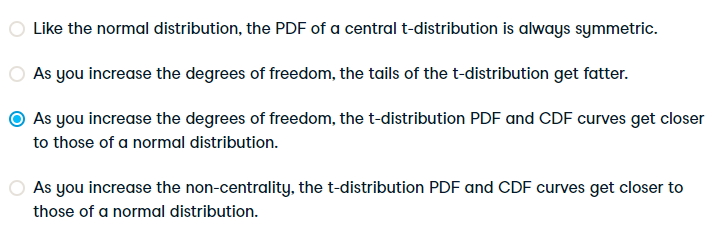

Tip-top t! The normal distribution is essentially a t-distribution with infinite degrees of freedom.

**Exercise**

**From t to p**

Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

Ho: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

Ha: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

The test statistic, t_stat, is available, as are the samples sizes for each group, n_no and n_yes. Use a significance level of alpha = 0.05.

t has also been imported from scipy.stats.

**Instructions**

- Question : What type of test does the alternative hypothesis indicate that we need?

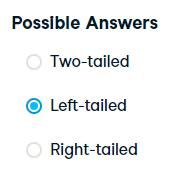

----------

- Calculate the degrees of freedom for the test.
- Compute the p-value using the test statistic, t_stat.

----------

- Question : What decision should you make based on the results of the hypothesis test?

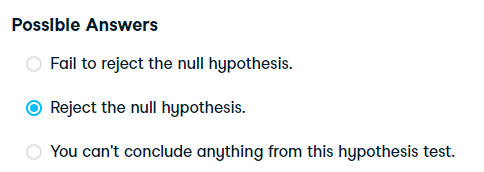

Perspicacious p-value predictions! When the standard error is estimated from the sample standard deviation and sample size, the test statistic is transformed into a p-value using the t-distribution.

In [141]:
xbar_yes = late_shipments[(late_shipments['late'] == "Yes")]['weight_kilograms'].mean()
xbar_yes

2715.6721311475408

In [142]:
xbar_no = late_shipments[(late_shipments['late'] == "No")]['weight_kilograms'].mean()
xbar_no

1897.7912673056444

In [143]:
s_yes = late_shipments[(late_shipments['late'] == "Yes")]['weight_kilograms'].std()
s_yes

2544.688210903328

In [144]:
s_no = late_shipments[(late_shipments['late'] == "No")]['weight_kilograms'].std()
s_no

3154.039507084167

In [145]:
numerator = xbar_yes - xbar_no
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)
t_stat = numerator / denominator
print(t_stat)

2.3936661778766433


In [146]:
n_no

939

In [147]:
n_yes

61

In [148]:
alpha = 0.05

In [149]:
from scipy.stats import t

In [150]:
# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value = t.cdf(-t_stat, degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249523


In [151]:
# Burada t-stat niçin negatif alındı? Left Tailed olduğu için mi? İncele

### 2 03 Paired t-tests

1. Paired t-tests

Previously, we used the t-distribution to compute a p-value from a standardized test statistic related to the difference in means across two groups.

2. US Republican presidents dataset

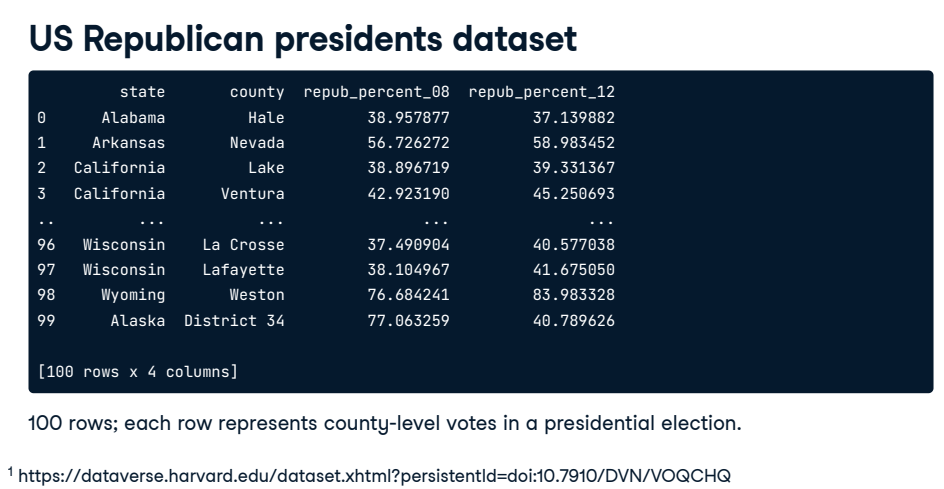

Here's a dataset of US presidential elections. Each row represents a presidential election at the county level. The variables in the dataset are the US state, the county within that state, and the percentage of votes for the Republican candidate in 2008, and in 2012.

1 https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ

3. Hypotheses

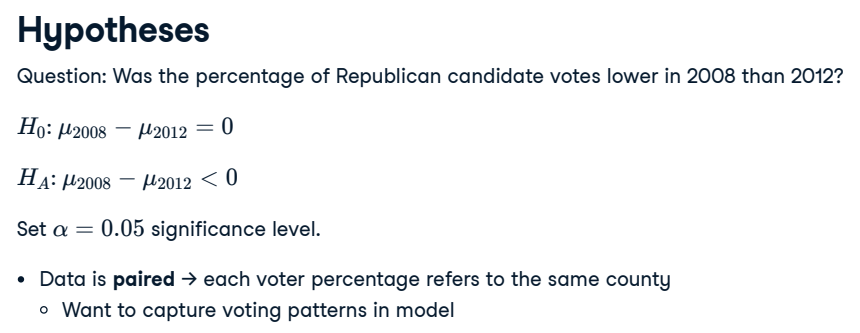

One question is whether the percentage of votes for the Republican candidate was lower in 2008 compared to 2012. To test this, we form hypotheses. As before, the null hypothesis is that our hunch is wrong, and that the population parameters are the same in each year group. The alternative hypothesis is that the parameter in 2008 was lower than in 2012. Let's set a significance level of point-zero-five. One feature of this dataset is that the 2008 votes and the 2012 votes are paired, which means they aren't independent, since they both refer to the same county. This means voting patterns may occur due to county-level demographics and local politics, and we want to capture this pairing in our model.

4. From two samples to one

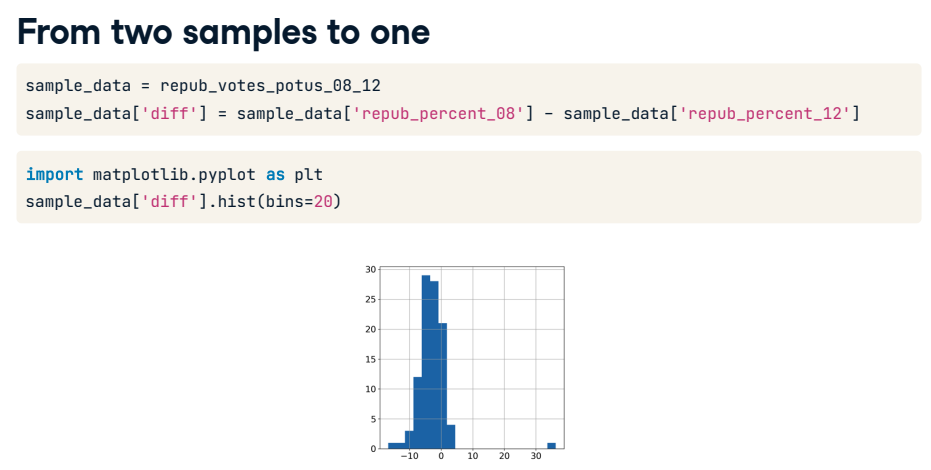

For paired analyses, rather than considering the two variables separately, we can consider a single variable of the difference. This is stored in a DataFrame called sample_data with a column named diff. In this histogram of the difference, most values are between minus ten and ten, with at least one outlier.

5. Calculate sample statistics of the difference

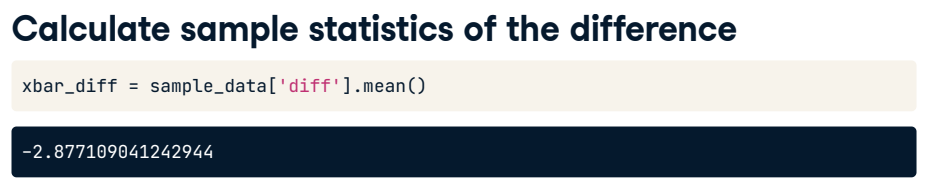

The sample mean, x-bar, is calculated from this difference. It is around minus two-point-eight-eight.

6. Revised hypotheses

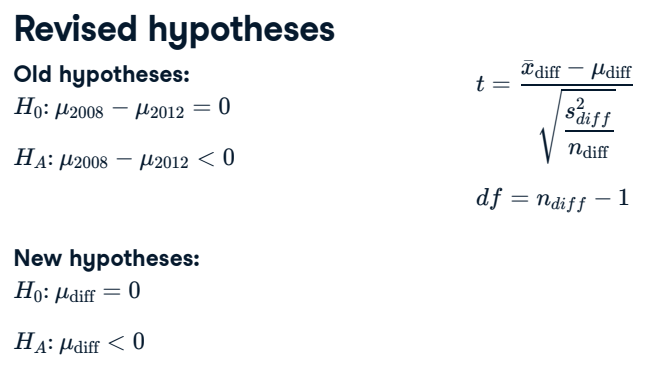

We can restate the hypotheses in terms of the single population mean, mu-diff, being equal to or less than zero. The test statistic, t, has a slightly simpler equation compared to the two sample case. We have one statistic, so the number of degrees of freedom is the number of pairs minus one.

7. Calculating the p-value

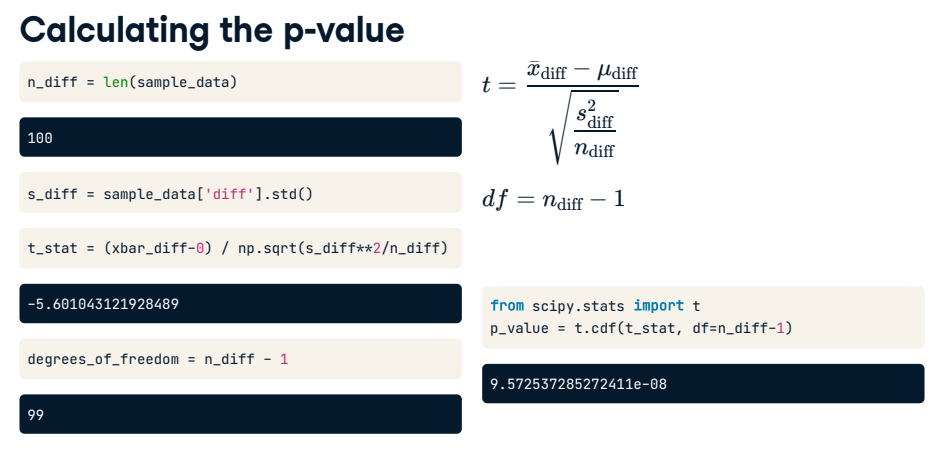

To calculate the test statistic, we need the number of rows in the dataset, one hundred, and the standard deviation of the differences. We already calculated x-bar-diff, the mean of the differences, as minus two-point-eight-eight. Assuming the null hypothesis is true means mu-diff is zero. We now have everything we need to plug into the equation to calculate t. It's minus five-point-six. The degrees of freedom are one less than n-diff at ninety nine. Finally, we transform t with the t-distribution CDF. The p-value is really small at around nine-point-six times ten to the minus eight. That means we reject the null hypothesis in favor of the alternative hypothesis that the Republican candidates got a smaller percentage of the vote in 2008 compared to 2012.

8. Testing differences between two means using ttest()

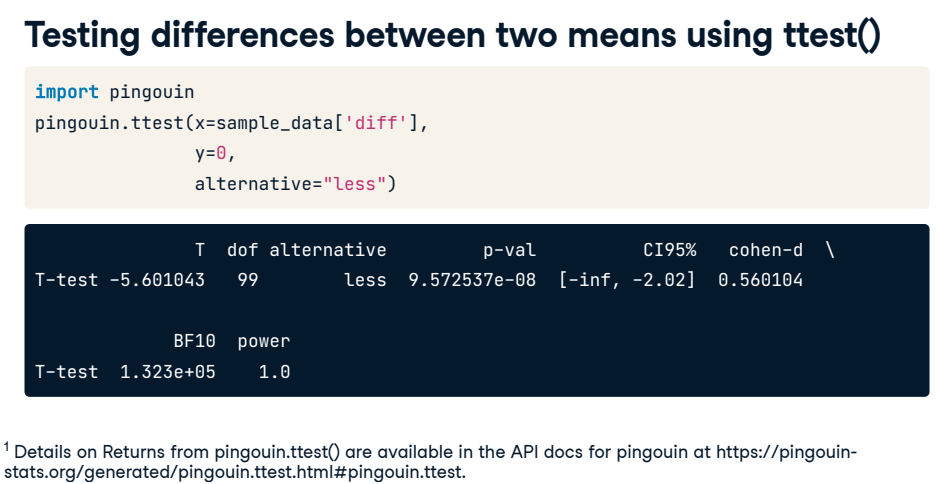

That was a lot of calculating. Fortunately, there's an easier way. The pingouin package provides a variety of different methods for hypothesis testing and returns the results as a pandas DataFrame. Its output can be a little friendlier to work with than similar methods from scipy-dot-stats. One method from pingouin is ttest and it works with array-like objects, so the first argument is the Series of differences. For a converted one sample test like this, y specifies the hypothesized difference value from the null hypothesis, which is zero. The type of alternative hypothesis can be specified as two-sided, less, or greater, corresponding to two-tailed, left-tailed, and right-tailed tests, respectively. Here's the output. We can recognize the value of the test statistic, the degrees of freedom, the alternative direction, and the p-value. The additional output refers to more advanced statistical concepts that are outside the scope of this course.

1 Details on Returns from pingouin.ttest() are available in the API docs for pingouin at https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest.

9. ttest() with paired=True

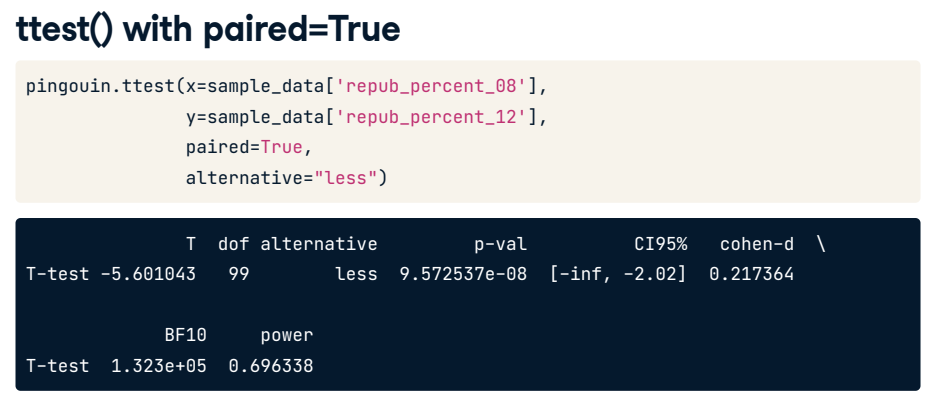

There's a variation of ttest for paired data that requires even less work. Rather than calculating the difference between the two paired variables, we can just pass them both directly to ttest as x and y, and set paired to True. Notice that the results in the first four columns are the same as before.

10. Unpaired ttest()

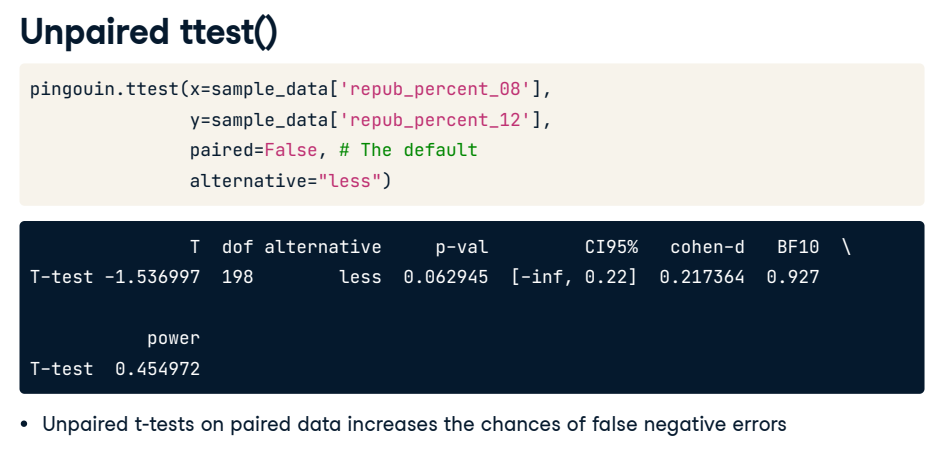

If we don't set paired to True and instead perform an unpaired t-test, then the numbers change. The test statistic is closer to zero, there are more degrees of freedom, and the p-value is much larger. Performing an unpaired t-test when our data is paired increases the chances of false negative errors.

11. Let's practice!

Time to perform some pairing.

**Exercise**

**Is pairing needed?**

t-tests are used to compare two sample means. However, the test involves different calculations depending upon whether the two samples are paired or not. To make sure you use the correct version of the t-test, you need to be able to identify pairing.

**Instructions**

- Match the problem description with whether a paired t-test or non-paired t-test should be conducted.

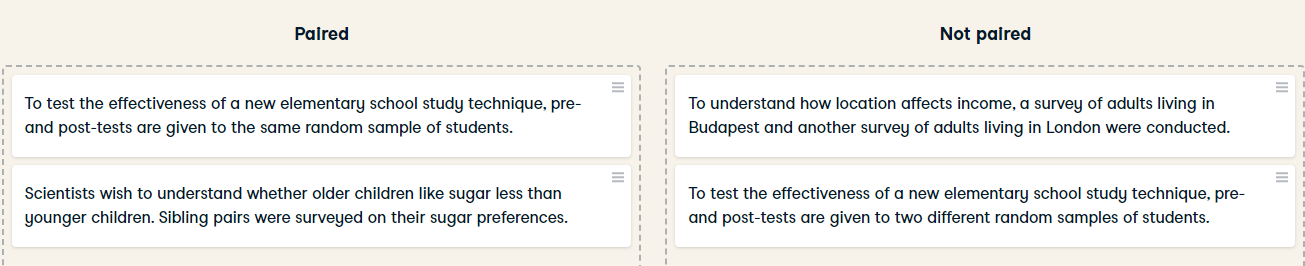

Daring pairing! If you have repeated observations of something, then those observations form pairs.

**Exercise**

**Visualizing the difference**

Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

dem_votes_potus_12_16 is available as sample_dem_data. pandas and matplotlib.pyplot are loaded with their usual aliases.

**Instructions**

- Create a new diff column containing the percentage of votes for the democratic candidate in 2012 minus the percentage of votes for the democratic candidate in 2016.
- Calculate the mean of the diff column as xbar_diff.
- Calculate the standard deviation of the diff column as s_diff.
- Plot a histogram of the diff column with 20 bins.

In [152]:
sample_dem_data = democrat_votes.copy()

In [153]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Print sample_dem_data
print(sample_dem_data)

       state       county  dem_percent_12  dem_percent_16       diff
0    Alabama      Bullock       76.305900       74.946921   1.358979
1    Alabama      Chilton       19.453671       15.847352   3.606319
2    Alabama         Clay       26.673672       18.674517   7.999155
3    Alabama      Cullman       14.661752       10.028252   4.633500
4    Alabama     Escambia       36.915731       31.020546   5.895185
..       ...          ...             ...             ...        ...
495  Wyoming        Uinta       19.065464       14.191263   4.874201
496  Wyoming     Washakie       20.131846       13.948610   6.183235
497   Alaska   District 3       33.514582       16.301064  17.213518
498   Alaska  District 18       61.284271       52.810051   8.474220
499   Alaska  District 24       42.913980       39.405286   3.508694

[500 rows x 5 columns]


In [154]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff)

6.829312660106832


In [155]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print s_diff
print(s_diff)

5.040139140132316


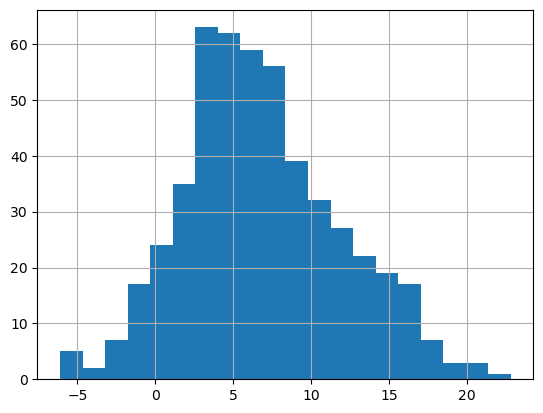

In [156]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

Delightful difference discovery! Notice that the majority of the histogram lies to the right of zero.

**Exercise**

**Using ttest()**

Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

Ho: The proportion of democratic votes in 2012 and 2016 were the same. 
Ha: The proportion of democratic votes in 2012 and 2016 were different.

sample_dem_data is available and has the columns diff, dem_percent_12, and dem_percent_16 in addition to the state and county names. pingouin and has been loaded along with pandas as pd.

**Instructions**

- Conduct a t-test on the sample differences (the diff column of sample_dem_data), using an appropriate alternative hypothesis chosen from "two-sided", "less", and "greater".
- Question : What's the correct decision from the t-test, assuming alpha=0.01?
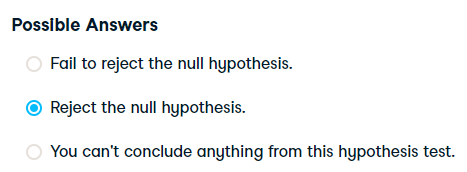
- Conduct a paired test on the democratic votes in 2012 and 2016 (the dem_percent_12 and dem_percent_16 columns of sample_dem_data), using an appropriate alternative hypothesis.
- Question : Compare the paired t-test to an (inappropriate) unpaired test on the same data. How does the p-value change?
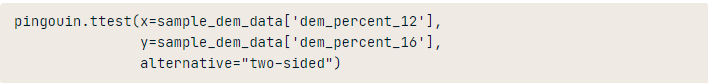
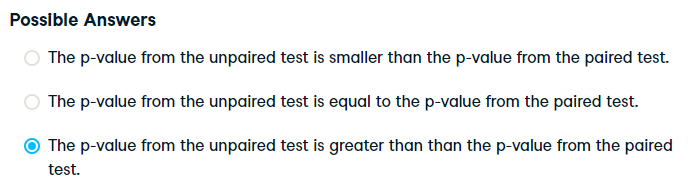
Paired t-test party! Using .ttest() lets you avoid manual calculation to run your test. When you have paired data, a paired t-test is preferable to the unpaired version because it reduces the chance of a false negative error.

In [157]:
# !pip install pingouin

In [158]:
import pingouin

# https://towardsdatascience.com/the-new-kid-on-the-statistics-in-python-block-pingouin-6b353a1db57c

In [159]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'],
                              y=0,
                              alternative="two-sided")
                              
# Print the test results
print(test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


- Question : What's the correct decision from the t-test, assuming alpha=0.01?
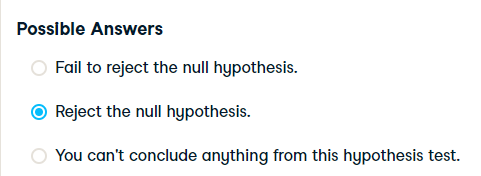

In [160]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              alternative="two-sided")

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                                     y=sample_dem_data['dem_percent_16'],
                                     paired=True, 
                                     alternative="two-sided")
                              
# Print the paired test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


In [161]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              alternative="two-sided")

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                                     y=sample_dem_data['dem_percent_16'],
                                     paired=False, # DEFAULT
                                     alternative="two-sided")
                              
# Print the paired test results
print(paired_test_results)

               T  dof alternative         p-val        CI95%   cohen-d  \
T-test  7.181565  998   two-sided  1.345737e-12  [4.96, 8.7]  0.454202   

             BF10  power  
T-test  4.308e+09    1.0  


- Question : Compare the paired t-test to an (inappropriate) unpaired test on the same data. How does the p-value change?
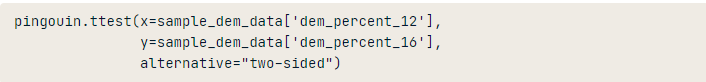
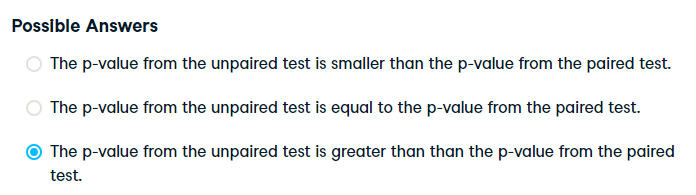
Paired t-test party! Using .ttest() lets you avoid manual calculation to run your test. When you have paired data, a paired t-test is preferable to the unpaired version because it reduces the chance of a false negative error.

### 2 04 ANOVA tests

1. ANOVA tests

We've seen how to compare two groups in the unpaired and paired cases. But what if there are more than two groups?

2. Job satisfaction: 5 categories

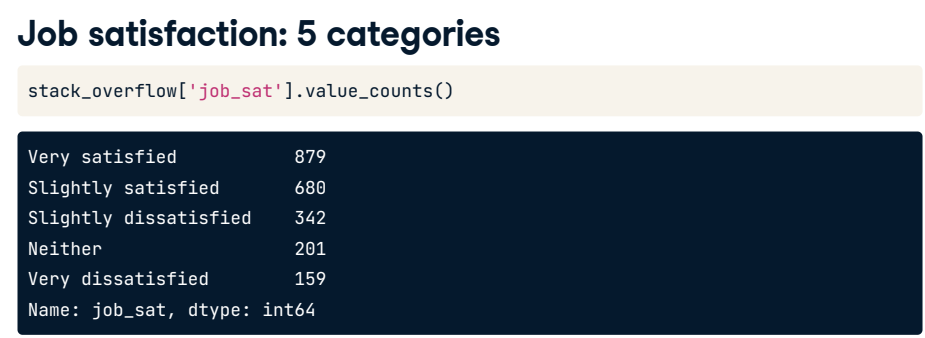

The Stack Overflow survey includes a job satisfaction variable, with five categories from "Very satisfied" down to "Very dissatisfied".

3. Visualizing multiple distributions

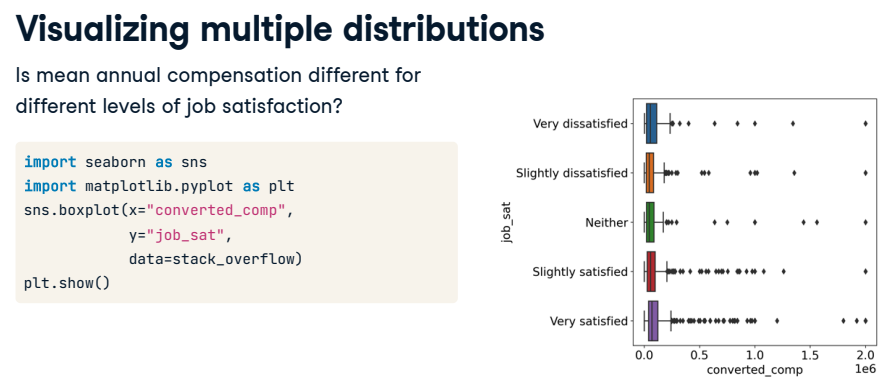

Suppose we want to know if mean annual compensation is different for each of the levels of job satisfaction. The first thing to do is visualize the distributions with box plots. Seaborn's boxplot method provides a nice option here with converted_comp on the horizontal axis and job_sat on the vertical axis using the stack_overflow data. "Very satisfied" looks slightly higher than the others, but to see if they are significantly different, we'll need to use hypothesis tests.

4. Analysis of variance (ANOVA)

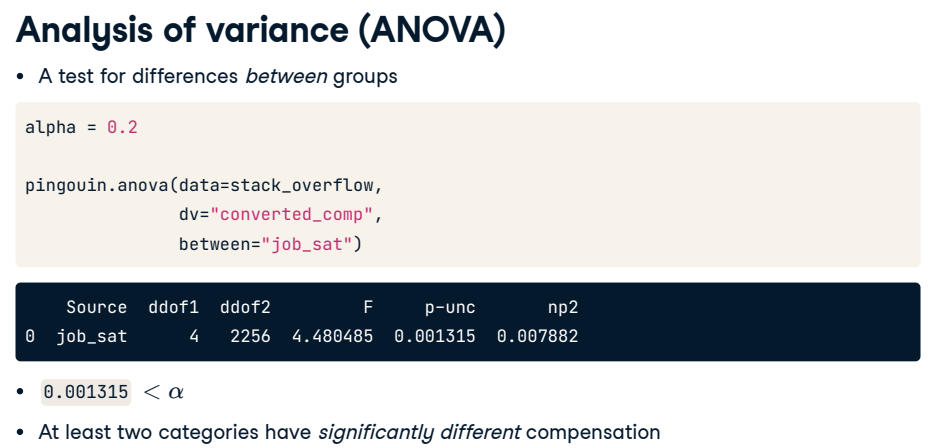

ANOVA tests determine whether there are differences between the groups. We begin by setting our significance level to point-two. This value is larger than in many situations but will help us understand the implications on comparing different numbers of groups later on. We use the pingouin anova method to compare values across multiple groups. We specify the data as stack_overflow, the dependent variable, dv, as converted_comp, and the column of groups to calculate between as job_sat. The p-value is stored in the p-unc column, which is point-zero-zero-one-three, which is smaller than alpha at 20 percent. That means that at least two of the categories of job satisfaction have significant differences between their compensation levels, but this doesn't tell us which two categories they are.

5. Pairwise tests

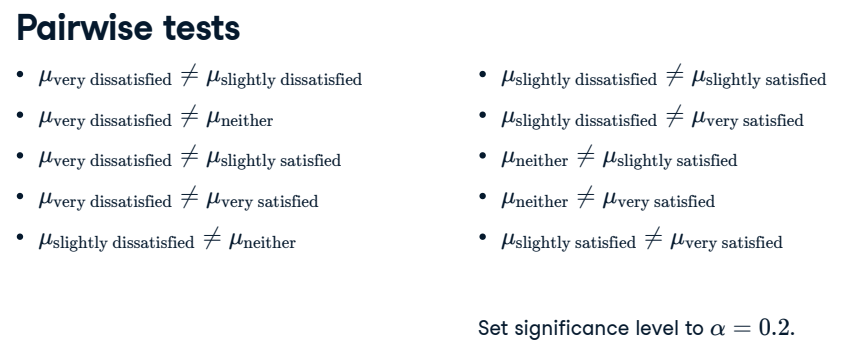

To identify which categories are different, we compare all five job satisfaction categories, testing on each pair in turn. There are ten ways of choosing two items from a set of five, so we have ten tests to perform. Our significance level is still point-two.

6. pairwise_tests()

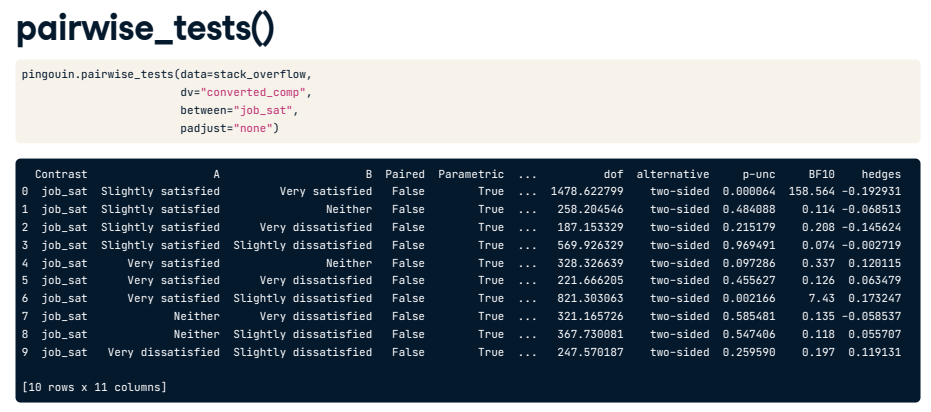

To run all these hypothesis tests in one go, we can use pairwise_tests. The first three arguments of data, dv, and between are the same as the anova method. We'll discuss p-adjust shortly. The result shows a DataFrame where A and B are the two levels being compared on each row. Next, we look at the p-unc column of p-values. Three of these are less than our significance level of point-two.

7. As the number of groups increases...

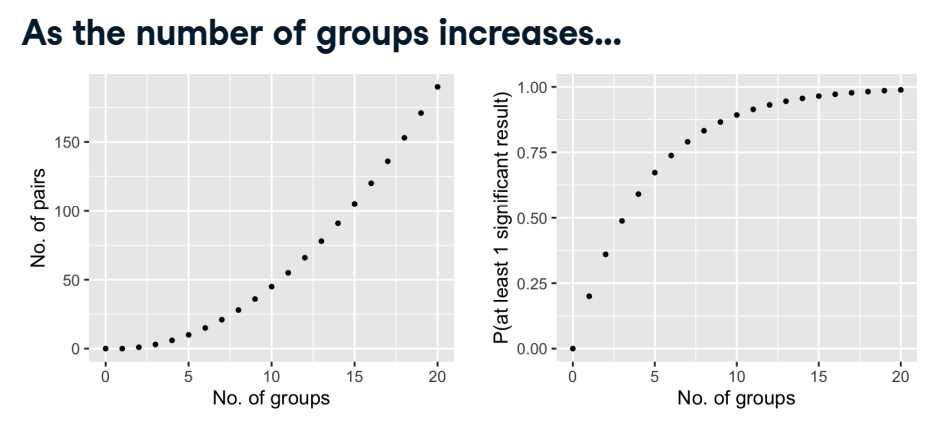

In this case we have five groups, resulting in ten pairs. As the number of groups increases, the number of pairs - and hence the number of hypothesis tests we must perform - increases quadratically. The more tests we run, the higher the chance that at least one of them will give a false positive significant result. With a significance level of point-two, if we run one test, the chance of a false positive result is point-two. With five groups and ten tests, the probability of at least one false positive is around point-seven. With twenty groups, it's almost guaranteed that we'll get at least one false positive.

8. Bonferroni correction

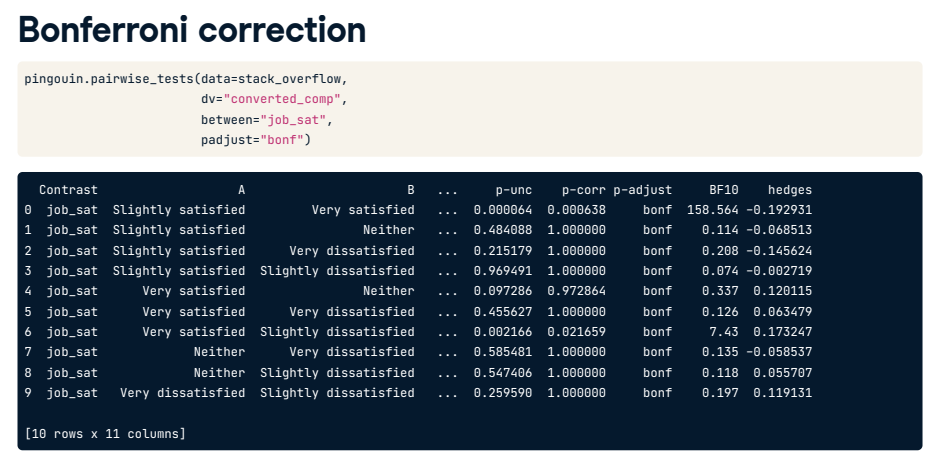

The solution to this is to apply an adjustment to increase the p-values, reducing the chance of getting a false positive. One common adjustment is the Bonferroni correction. Looking at the p-corr column corresponding to corrected p-values, as opposed to the p-unc column for uncorrected, only two of the pairs appear to have significant differences.

9. More methods

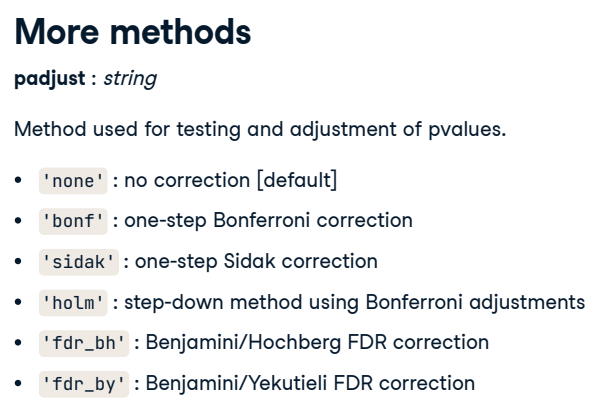

pingouin provides several options for adjusting the p-values with some being more conservative than others. No adjustment with none is the default, but in almost all pairwise t-testing situations choosing a correction method is more appropriate.

10. Let's practice!

Let's run lots of tests.

**Exercise**

**Visualizing many categories**

So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases, and seaborn is loaded as sns.

**Instructions**

- Group late_shipments by shipment_mode and calculate the mean pack_price for each group, storing the result in xbar_pack_by_mode.
- Group late_shipments by shipment_mode and calculate the standard deviation pack_price for each group, storing the result in s_pack_by_mode.
- Create a boxplot from late_shipments with "pack_price" as x and "shipment_mode" as y

In [162]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()

# Print the grouped means
print(xbar_pack_by_mode)

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64


In [163]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


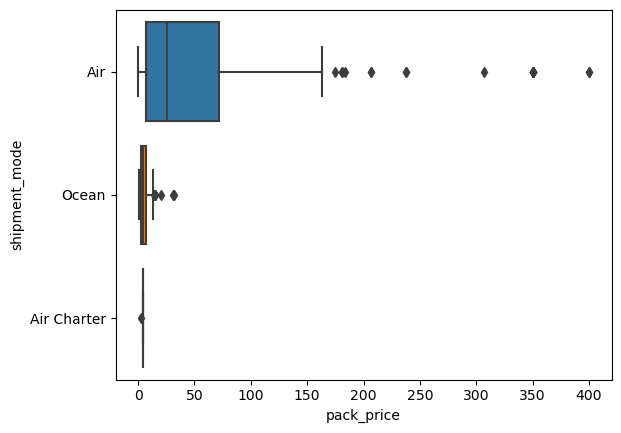

In [164]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x='pack_price',
            y='shipment_mode',
            data=late_shipments)
plt.show()

Beautiful boxplotting! There certainly looks to be a difference in the pack price between each of the three shipment modes. Do you think the differences are statistically significant?

**Exercise**

**Conducting an ANOVA test**

The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

Ho: Pack prices for every category of shipment mode are the same.

Ha: Pack prices for some categories of shipment mode are different.

Use a significance level of 0.1.

late_shipments is available and pingouin has been loaded.

**Instructions**

- Run an ANOVA on late_shipments investigating 'pack_price' (the dependent variable) between the groups of 'shipment_mode'.
- Question : Assuming a significance level of 0.1, should you reject the null hypothesis that there is no difference in pack prices between shipment modes?
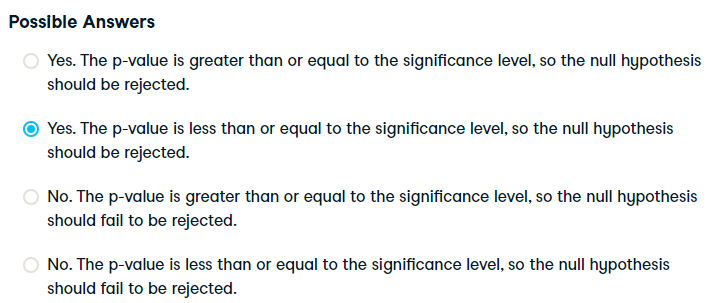
Amazing ANOVA! There is a significant difference in pack prices between the shipment modes. However, we don't know which shipment modes this applies to.

In [165]:
alpha = 0.1

In [166]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments,
                               dv='pack_price',
                               between='shipment_mode')

# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


**Exercise**

**Pairwise t-tests**

The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

late_shipments is available and pingouin has been loaded.

**Instructions**

- Perform pairwise t-tests on late_shipments's pack_price variable, grouped by shipment_mode, without doing any p-value adjustment.
- Modify the pairwise t-tests to use the Bonferroni p-value adjustment.
- Question : Using the Bonferroni correction results and assuming a significance level of 0.1, for which pairs of shipment modes should you reject the null hypothesis that the pack prices are equal?
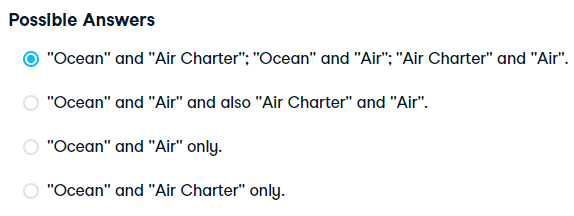
Pairwise perfection! After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1.

In [167]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments,
                                           dv='pack_price',
                                           between='shipment_mode')

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [168]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


## <a id="3"></a>
<font color="lightseagreen" size=+2.5><b>3. Proportion Tests</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Now it’s time to test for differences in proportions between two groups using proportion tests. Through hands-on exercises, you’ll extend your proportion tests to more than two groups with chi-square independence tests, and return to the one sample case with chi-square goodness of fit tests.

### 3 01 One-sample proportion tests

1. One-sample proportion tests

Let’s return to thinking about testing proportions, as we did in Chapter 1.

2. Chapter 1 recap

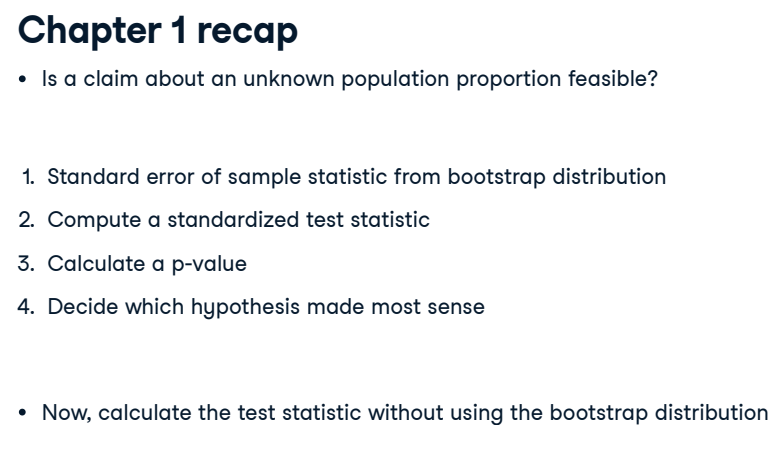

The hypothesis tests in Chapter 1 measured whether or not an unknown population proportion was equal to some value. We used bootstrapping on the sample to estimate the standard error of the sample statistic. The standard error was then used to calculate a standardized test statistic, the z-score, which was used to get a p-value, so we could decide whether or not to reject the null hypothesis. A bootstrap distribution can be computationally intensive to calculate, so this time we'll instead calculate the test statistic without it.

3. Standardized test statistic for proportions

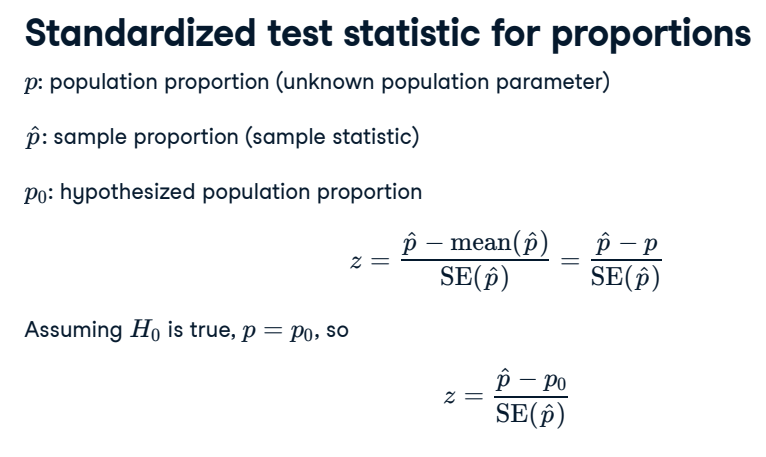

An unknown population parameter that is a proportion, or population proportion for short, is denoted p. The sample proportion is denoted p-hat, and the hypothesized value for the population proportion is denoted p-zero. As in Chapter 1, the standardized test statistic is a z-score. We calculate it by starting with the sample statistic, subtracting its mean, then dividing by its standard error. p-hat minus the mean of p-hat, divided by the standard error of p-hat. Recall from Sampling in Python that the mean of a sampling distribution of sample means, denoted by p-hat, is p, the population proportion. Under the null hypothesis, the unknown proportion p is assumed to be the hypothesized population proportion p-zero. The z-score is now p-hat minus p-zero, divided by the standard error of p-hat.

4. Simplifying the standard error calculations

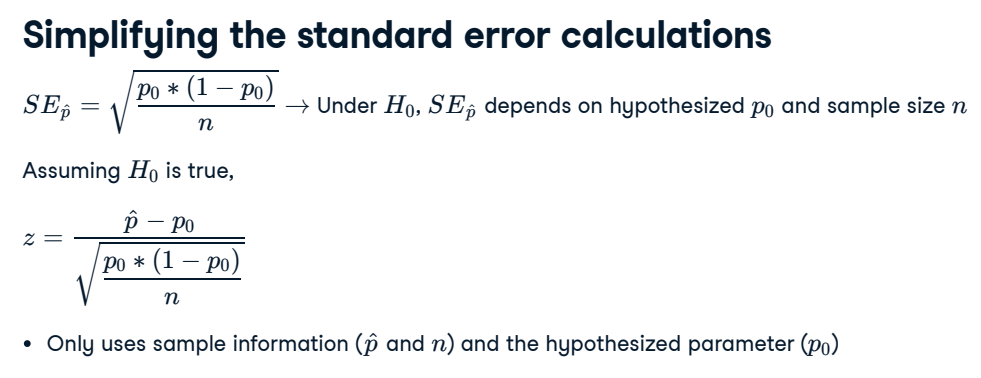

For proportions, under H-naught, the standard error of p-hat equation can be simplified to p-zero times one minus p-zero, divided by the number of observations, then square-rooted. We can substitute this into our equation for the z-score. This is easier to calculate because it only uses p-hat and n, which we get from the sample, and p-zero, which we chose.

5. Why z instead of t?

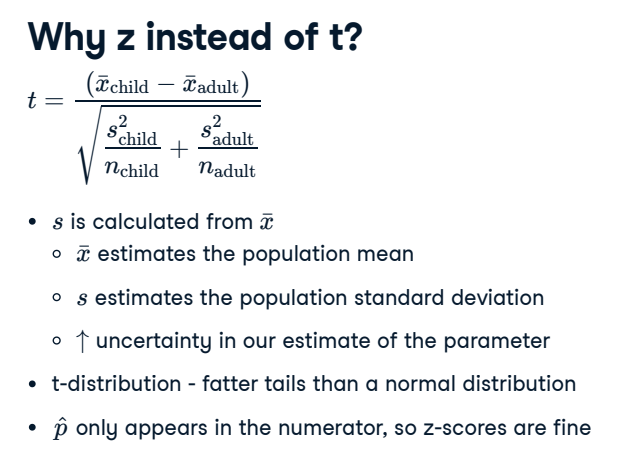

We might wonder why we used a z-distribution here, but a t-distribution in Chapter 2. This is the test statistic equation for the two sample mean case. The standard deviation of the sample, s, is calculated from the sample mean, x-bar. That means that x-bar is used in the numerator to estimate the population mean, and in the denominator to estimate the population standard deviation. This dual usage increases the uncertainty in our estimate of the population parameter. Since t-distributions are effectively a normal distribution with fatter tails, we can use them to account for this extra uncertainty. In effect, the t-distribution provides extra caution against mistakenly rejecting the null hypothesis. For proportions, we only use p-hat in the numerator, thus avoiding the problem with uncertainty, and a z-distribution is fine.

6. Stack Overflow age categories

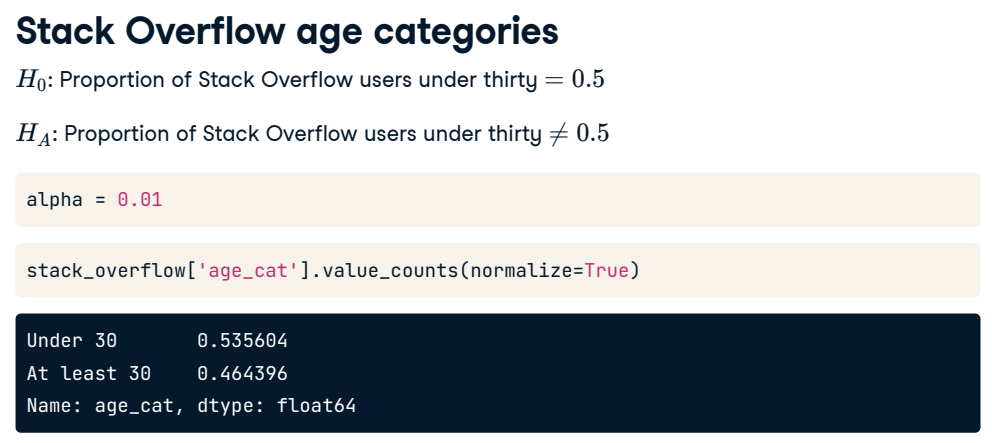

Returning to the Stack Overflow survey, let's hypothesize that half of the users in the population are under thirty and check for a difference. Let's set a significance level of point-zero-one. In the sample, just over half the users are under thirty.

7. Variables for z

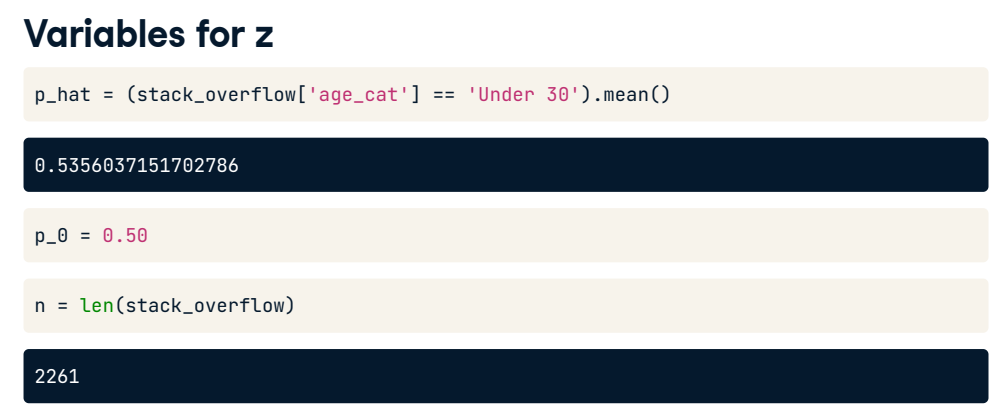

Let's get the numbers needed for the z-score. p-hat is the proportion of sample rows where age_cat equals under thirty. p-zero is point-five according to the null hypothesis. n is the number of rows in the dataset.

8. Calculating the z-score

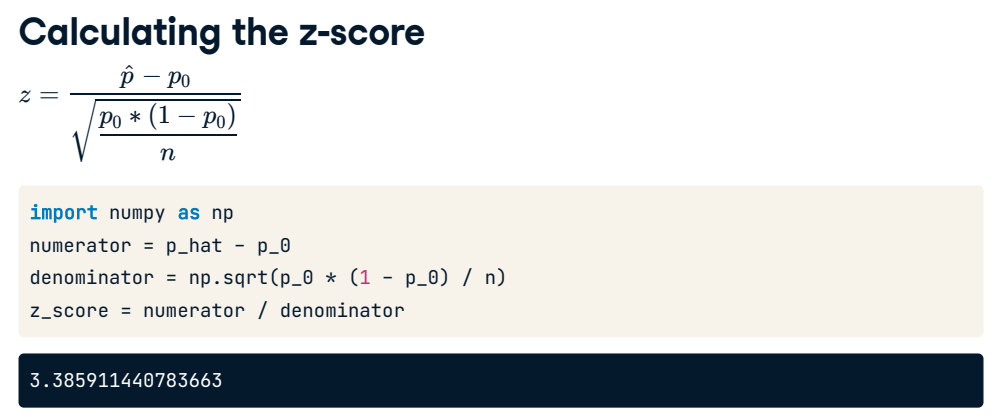

Inserting the values we calculated into the z-score equation yields a z-score of around three-point-four.

9. Calculating the p-value

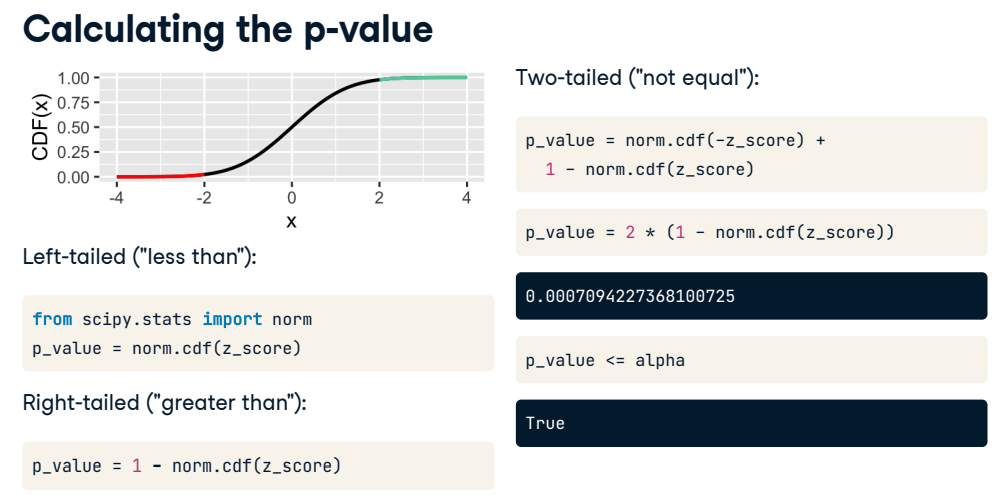

For left-tailed alternative hypotheses, we transform the z-score into a p-value using norm-dot-cdf. For right-tailed alternative hypotheses, we subtract the norm-dot-cdf result from one. For two-tailed alternative hypotheses, we check whether the test statistic lies in either tail, so the p-value is the sum of these two values: one corresponding to the z-score and the other to its negative on the other side of the distribution. Since the normal distribution PDF is symmetric, this simplifies to twice the right-tailed p-value since the z-score is positive. Here, the p-value is less than the significance level of point-zero-one, so we reject the null hypothesis, concluding that the proportion of users under thirty is not equal to point-five.

10. Let's practice!

Let's try an example.

## <a id="4"></a>
<font color="lightseagreen" size=+2.5><b>4. Non-Parametric Tests</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Finally, it’s time to learn about the assumptions made by parametric hypothesis tests, and see how non-parametric tests can be used when those assumptions aren't met.